# **Handwritten Digit Recognition**

## **Improting Required Libraries**

In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## **Loading the Dataset for training**

In [77]:
dataset = pd.read_csv("/content/data.csv")

In [78]:
dataset.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

## **Data Preparation for Building the Model**

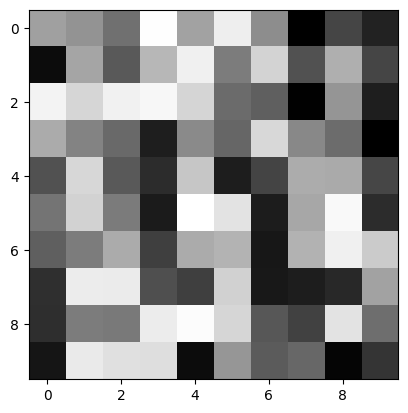

In [79]:
# Plotting images
a = np.random.random((10,10))
plt.figure()
plt.imshow(a, cmap='gray')
plt.show()

In [80]:
data = dataset.values[:5000]
data.shape

(5000, 785)

In [81]:
X, y = data[:,1:], data[:, 0]

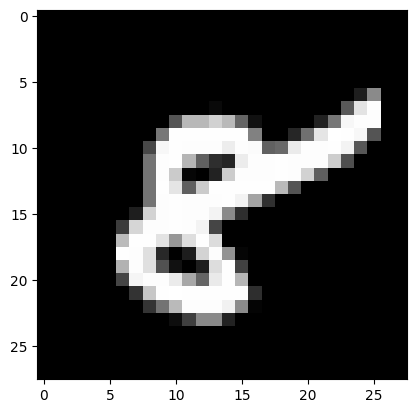

In [82]:
# Plotting digit
im = X[4997].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')
plt.show()

## **Spliting data into 60:40 and K=2**

### **Spliting of data into train and test**

In [83]:
split = int(X.shape[0] * 0.60)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [84]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [85]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [86]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [87]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=2)

0.9025

### **Loading the testing dataset**

In [88]:
test_df = pd.read_csv("/content/test.csv")

In [89]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [90]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

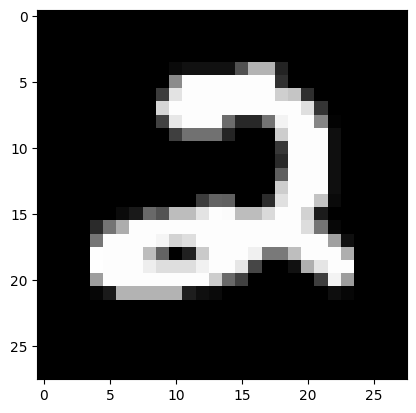

Label: 2.0


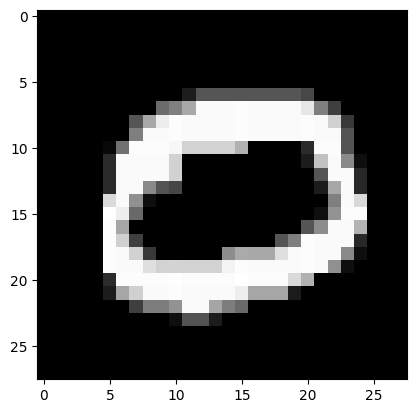

Label: 0.0


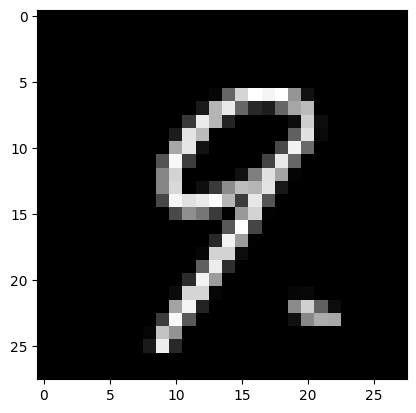

Label: 9.0


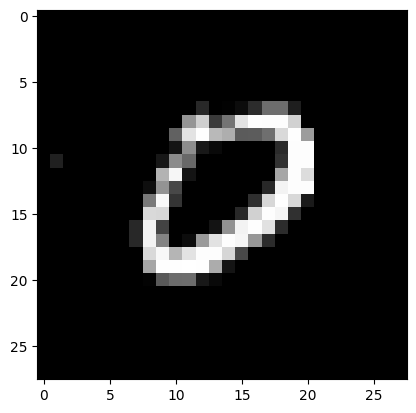

Label: 0.0


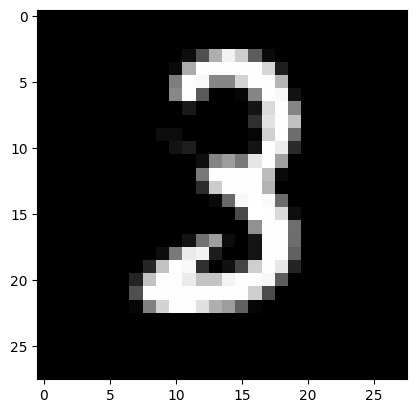

Label: 3.0


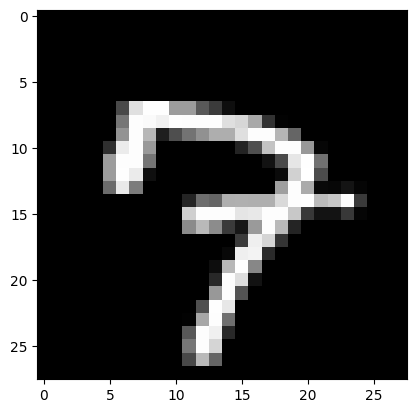

Label: 7.0


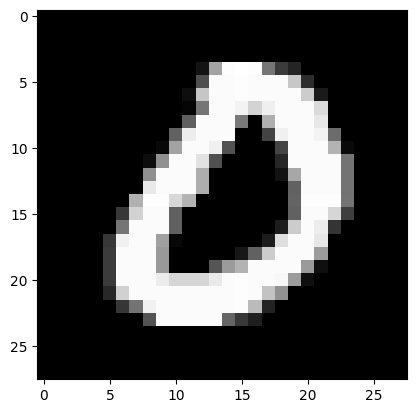

Label: 0.0


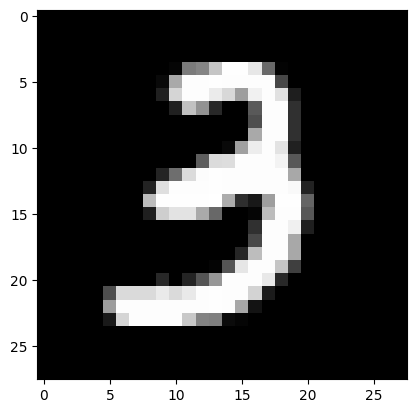

Label: 3.0


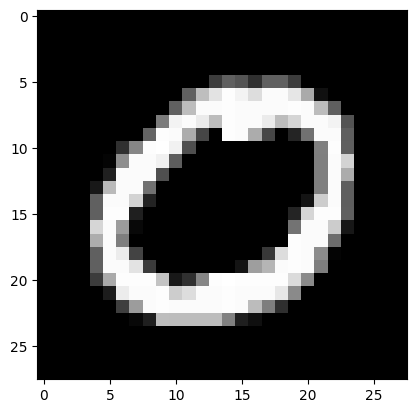

Label: 0.0


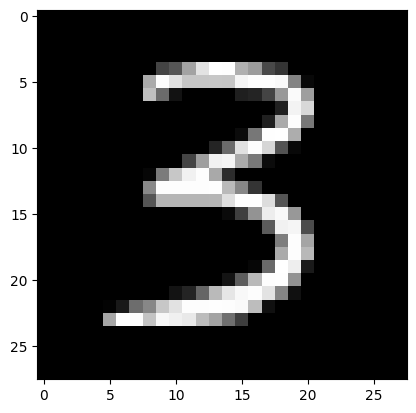

Label: 3.0


In [91]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=2))


## **Spliting data into 60:40 and K=4**

### **Spliting of data into train and test**

In [92]:
split = int(X.shape[0] * 0.60)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [93]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [94]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [95]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [96]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=4)

0.9155

### **Loading the testing dataset**

In [97]:

test_df = pd.read_csv("/content/test.csv")


In [98]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [99]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

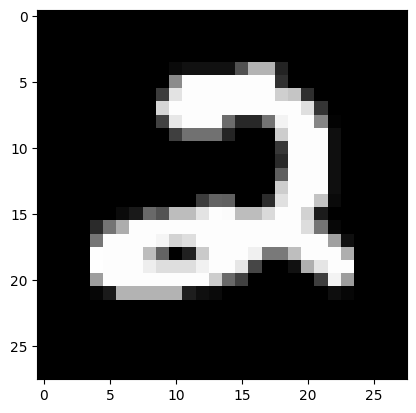

Label: 2.0


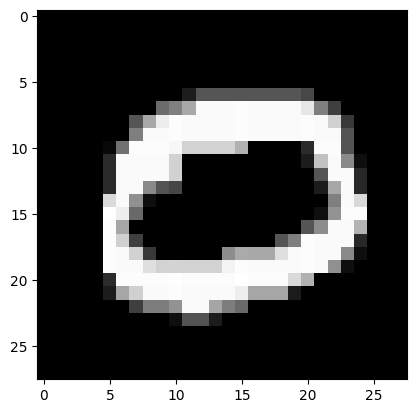

Label: 0.0


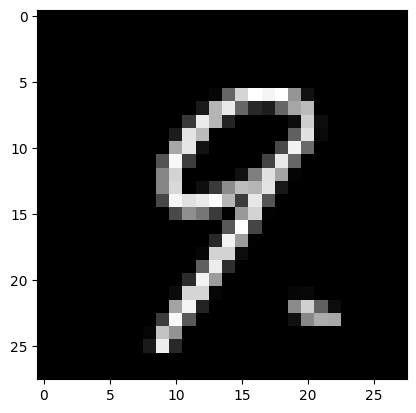

Label: 9.0


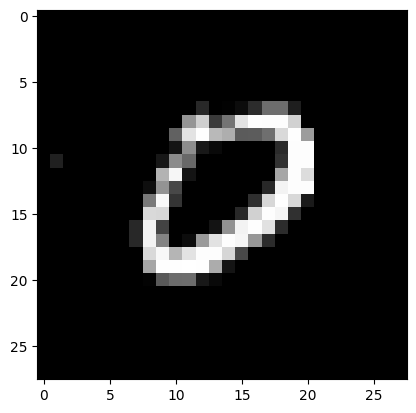

Label: 9.0


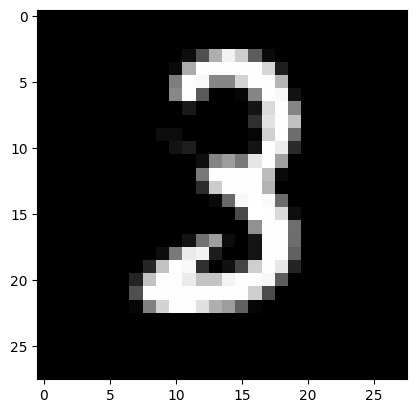

Label: 3.0


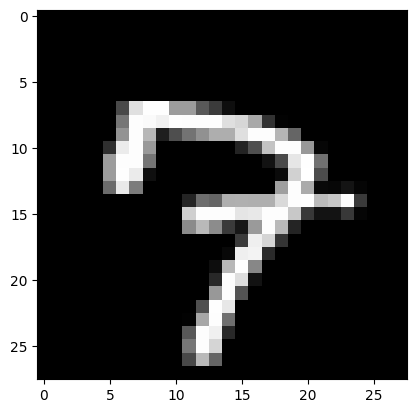

Label: 7.0


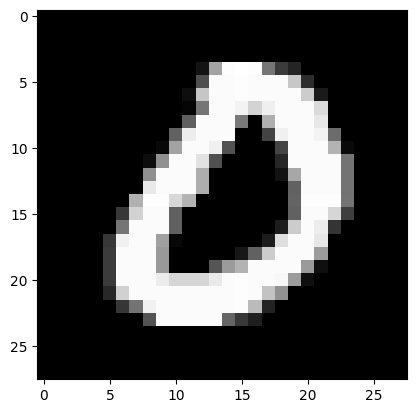

Label: 0.0


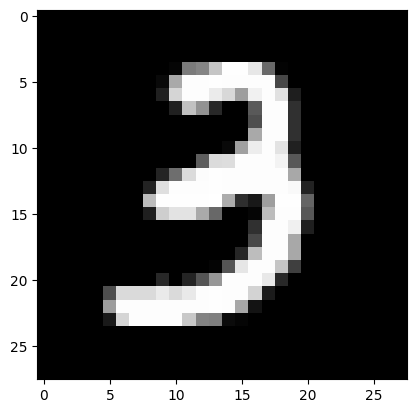

Label: 3.0


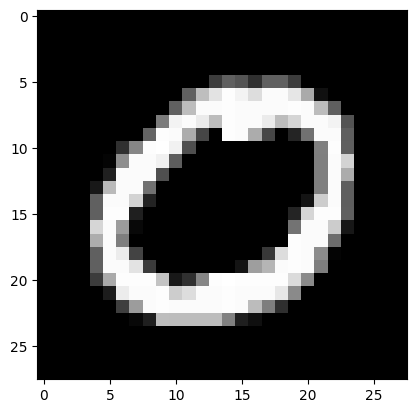

Label: 0.0


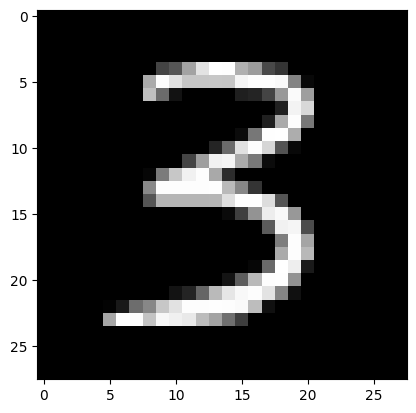

Label: 3.0


In [100]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 60:40 and K=5**

### **Spliting of data into train and test**

In [101]:
split = int(X.shape[0] * 0.60)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [102]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [103]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [104]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [105]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

0.914

### **Loading the testing dataset**

In [106]:

test_df = pd.read_csv("/content/test.csv")


In [107]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [108]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

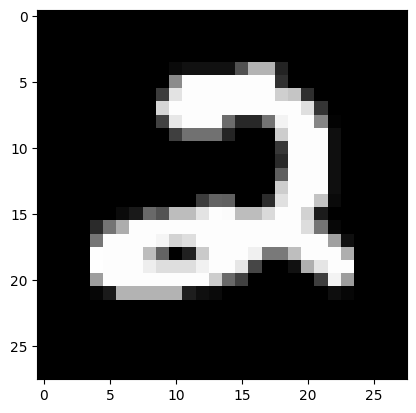

Label: 2.0


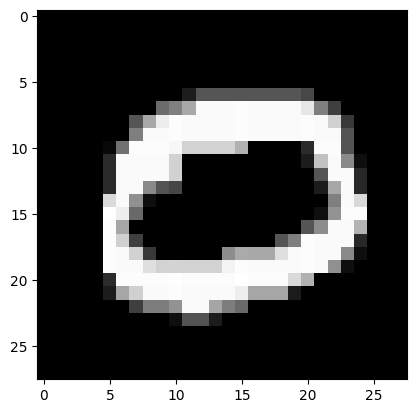

Label: 0.0


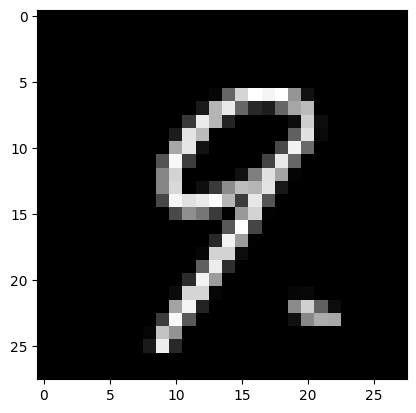

Label: 9.0


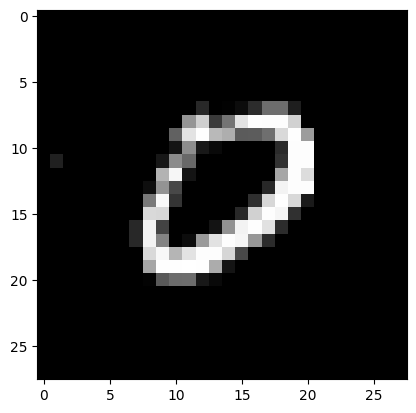

Label: 9.0


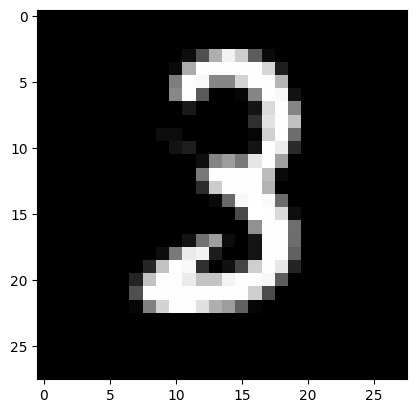

Label: 3.0


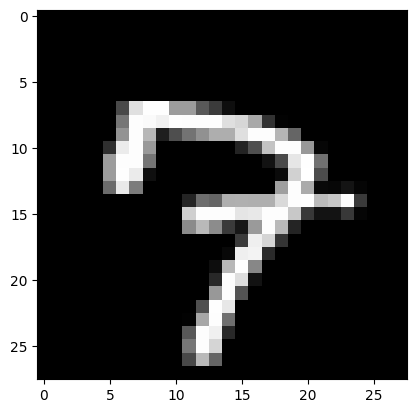

Label: 7.0


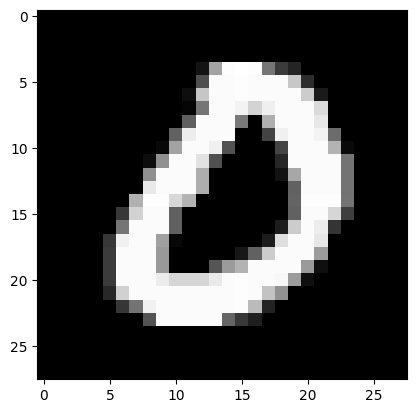

Label: 0.0


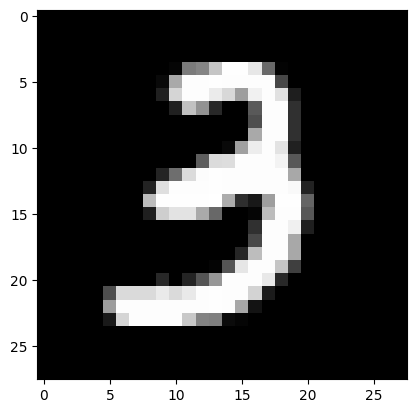

Label: 3.0


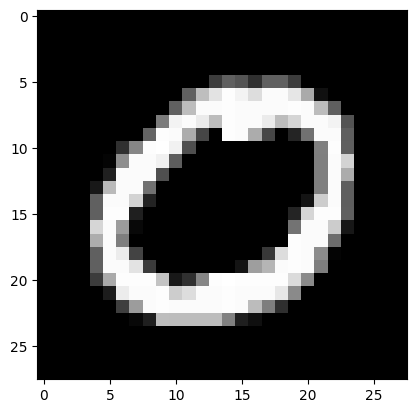

Label: 0.0


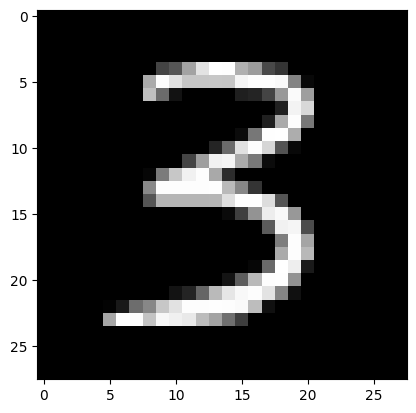

Label: 3.0


In [109]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 60:40 and K=6**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.60)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=6)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

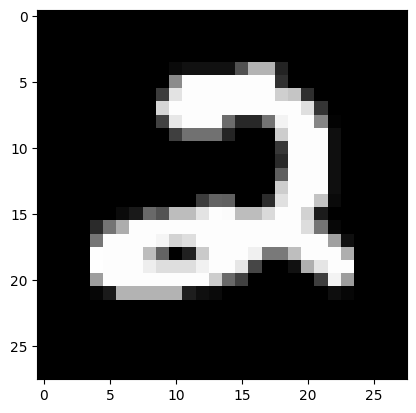

Label: 2.0


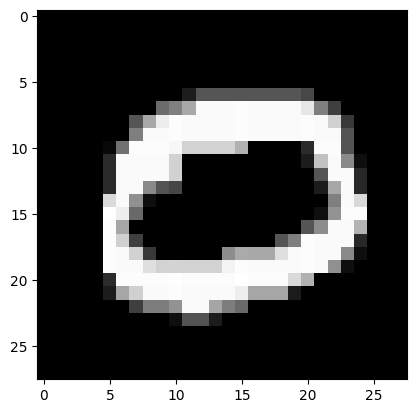

Label: 0.0


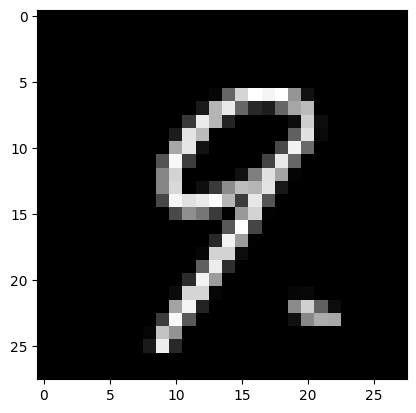

Label: 9.0


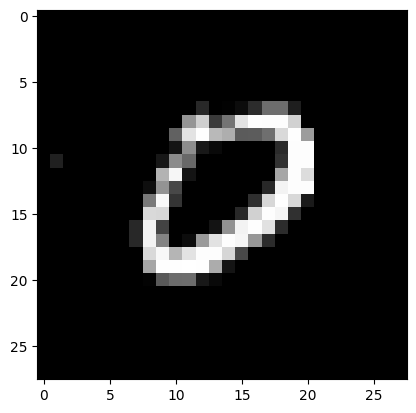

Label: 9.0


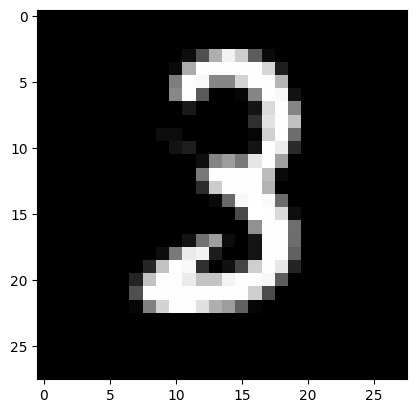

Label: 3.0


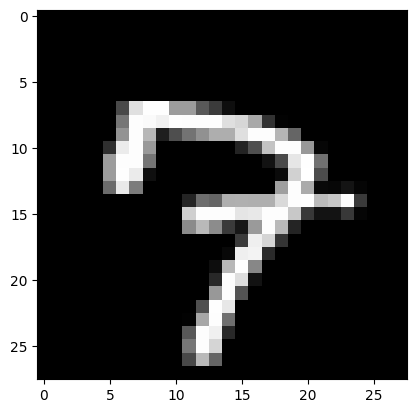

Label: 7.0


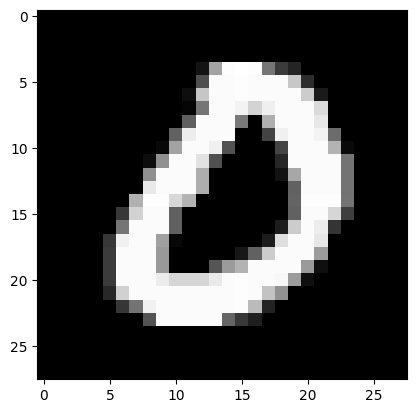

Label: 0.0


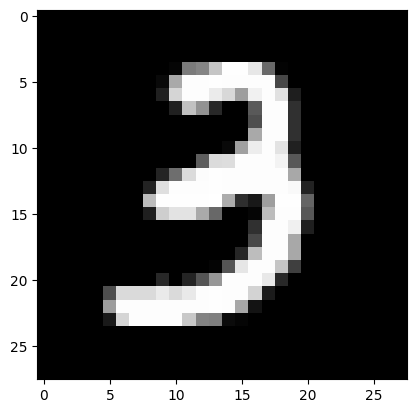

Label: 3.0


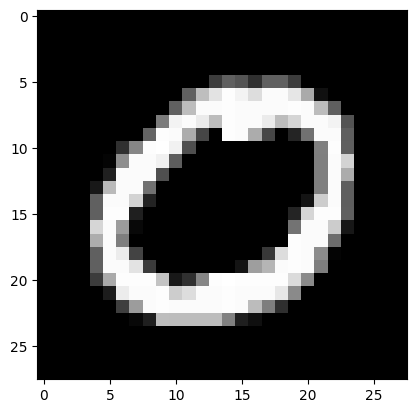

Label: 0.0


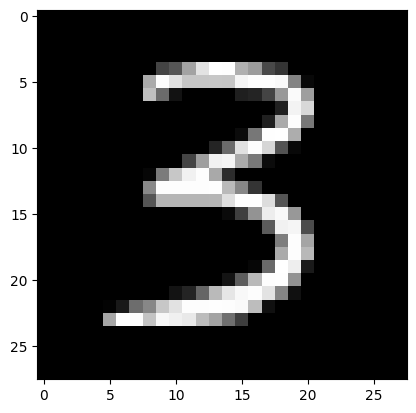

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 60:40 and K=7**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.60)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=7)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

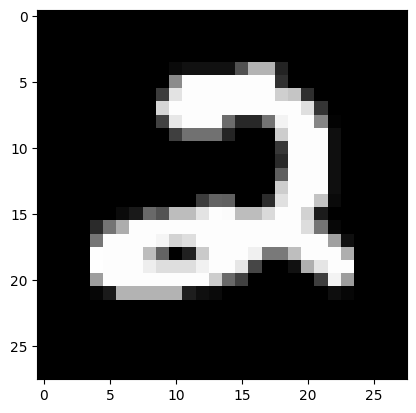

Label: 2.0


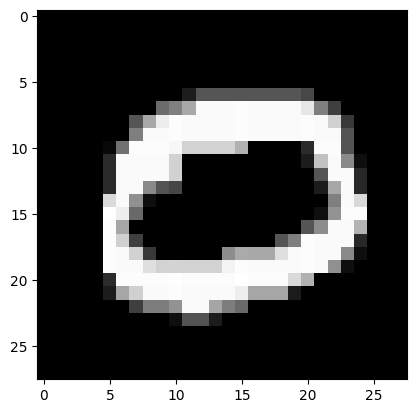

Label: 0.0


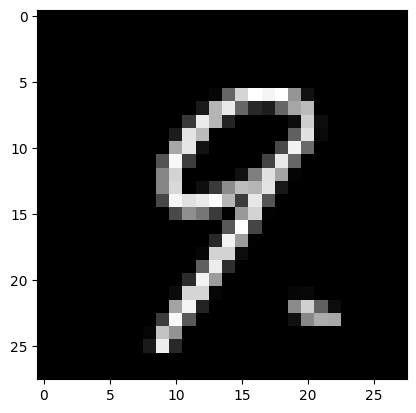

Label: 9.0


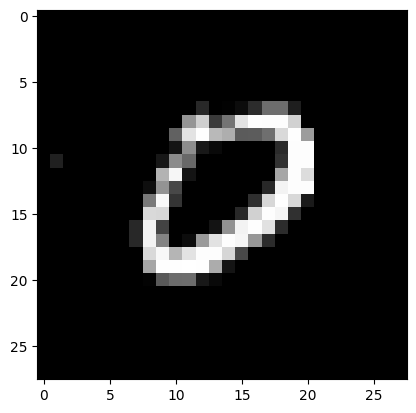

Label: 9.0


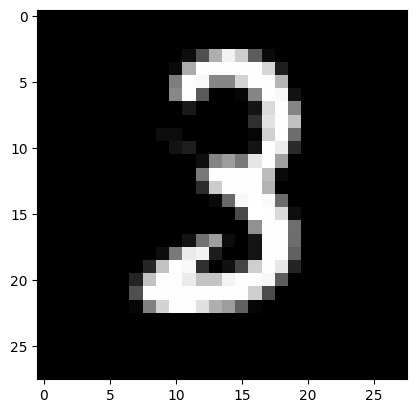

Label: 3.0


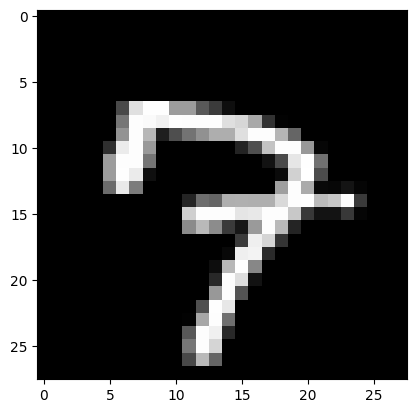

Label: 7.0


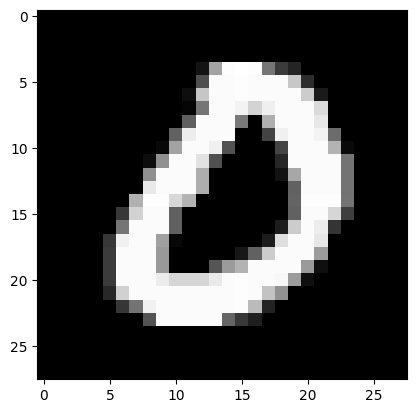

Label: 0.0


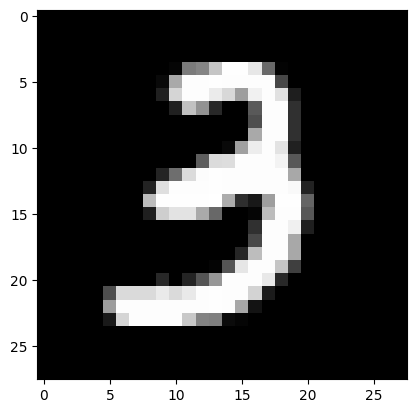

Label: 3.0


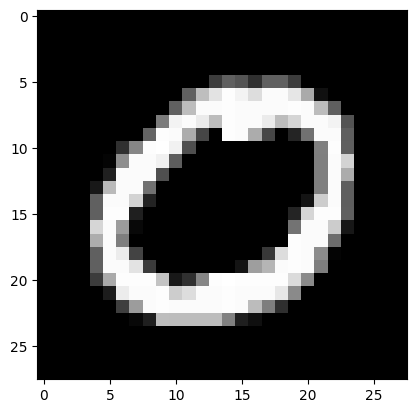

Label: 0.0


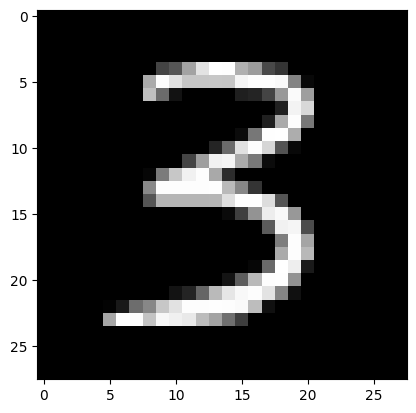

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 60:40 and K=10**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.60)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=10)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

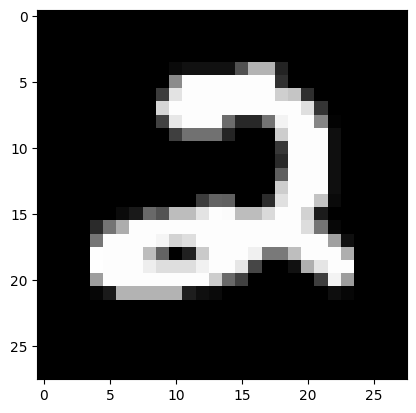

Label: 2.0


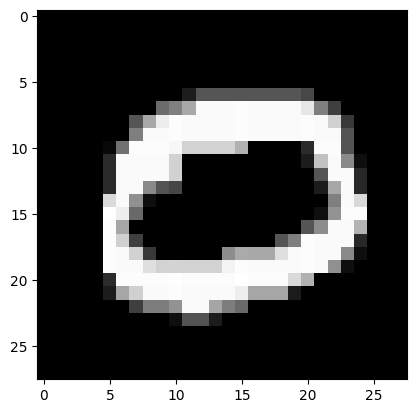

Label: 0.0


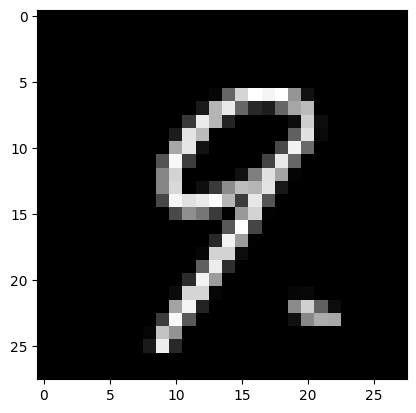

Label: 9.0


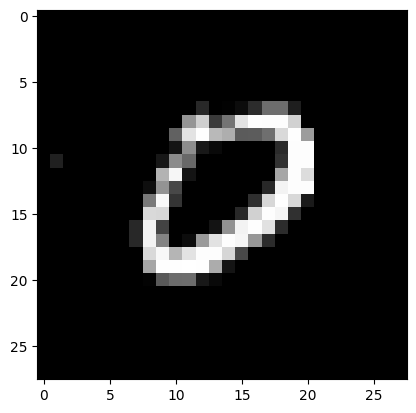

Label: 9.0


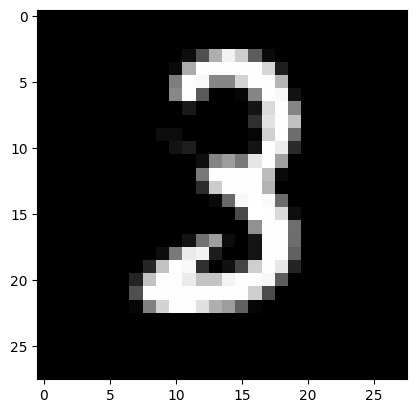

Label: 3.0


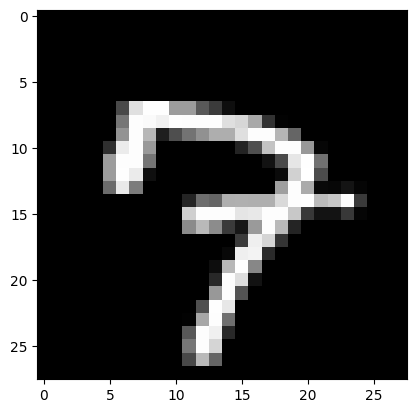

Label: 7.0


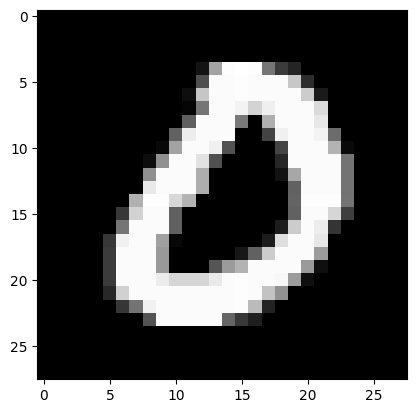

Label: 0.0


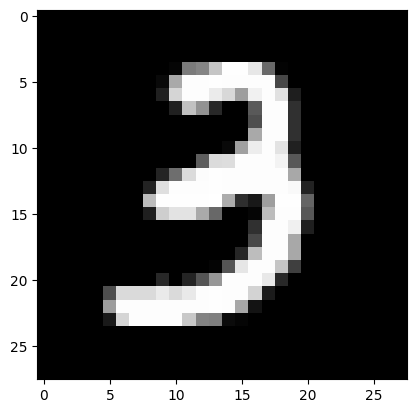

Label: 3.0


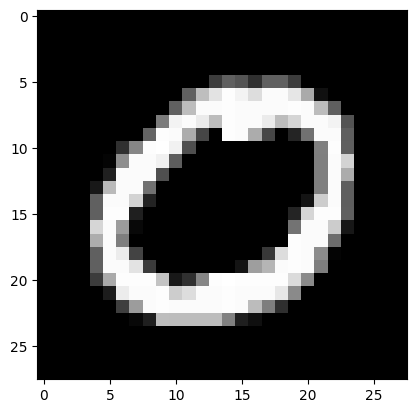

Label: 0.0


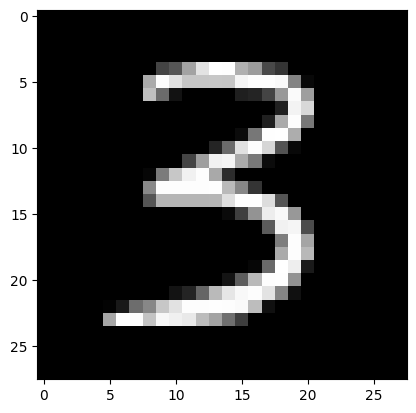

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 70:30 and K=2**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.70)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=2)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

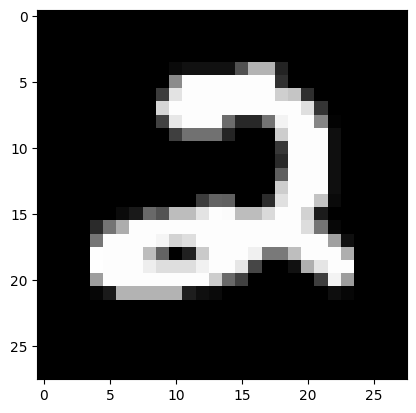

Label: 2.0


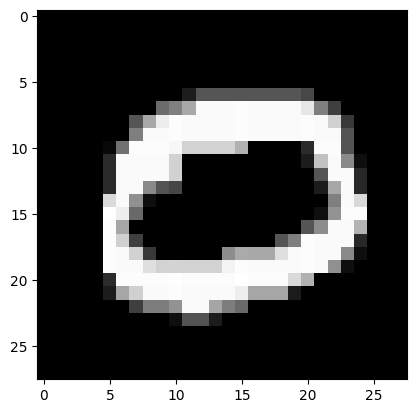

Label: 0.0


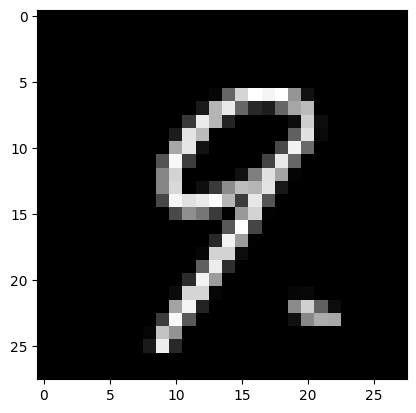

Label: 9.0


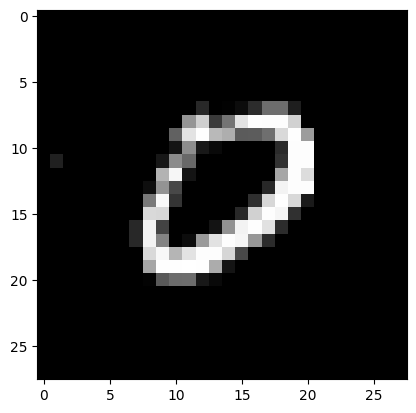

Label: 9.0


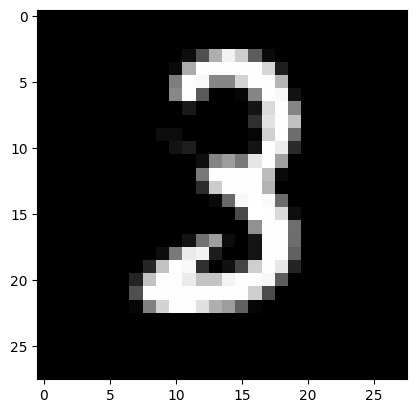

Label: 3.0


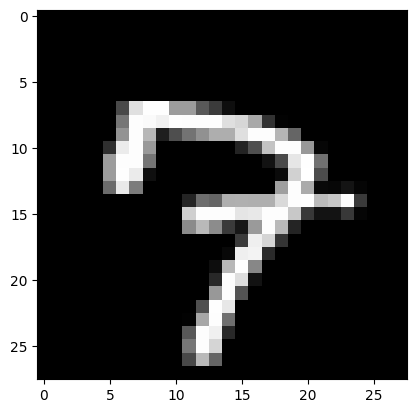

Label: 7.0


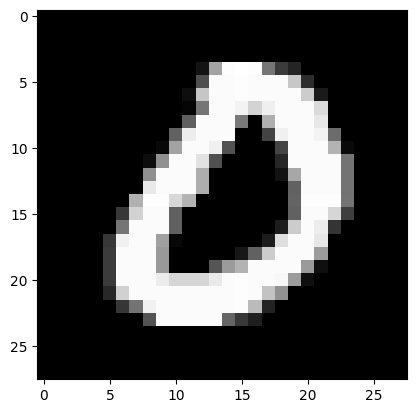

Label: 0.0


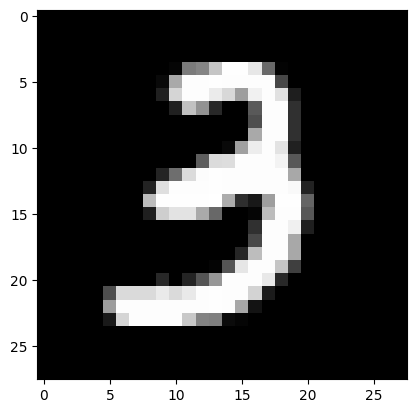

Label: 3.0


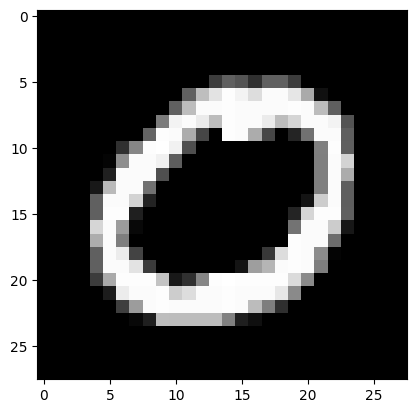

Label: 0.0


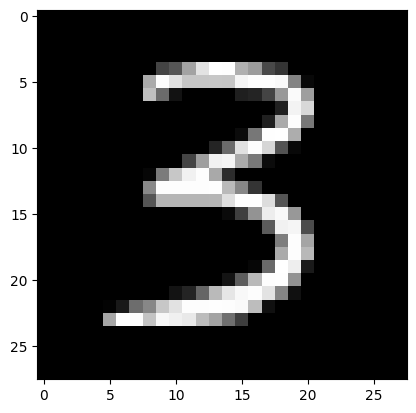

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 70:30 and K=4**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.70)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=4)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

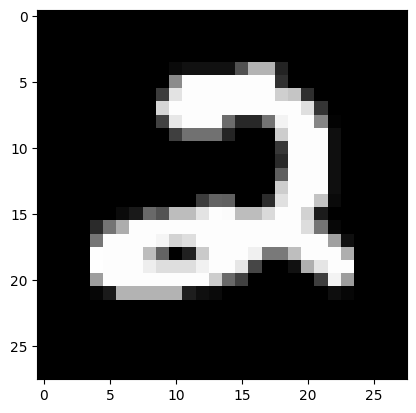

Label: 2.0


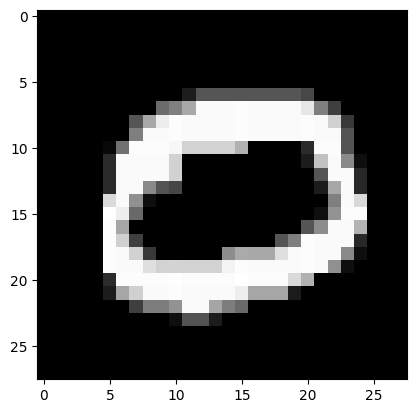

Label: 0.0


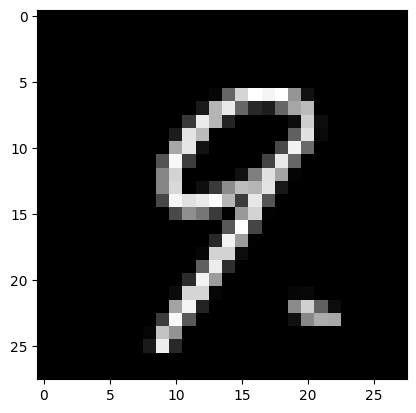

Label: 9.0


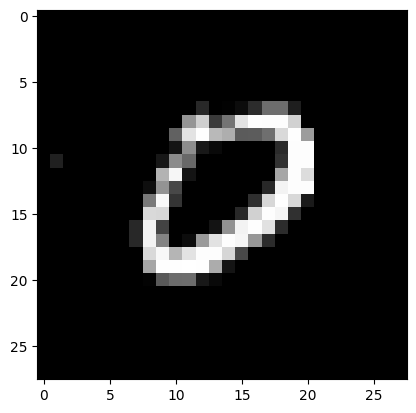

Label: 9.0


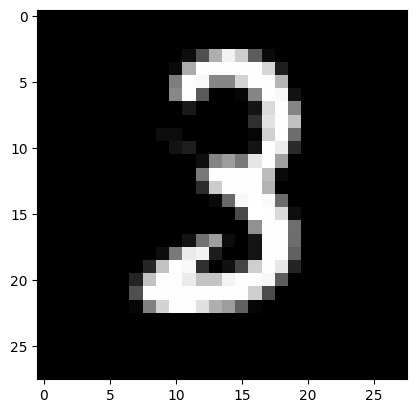

Label: 3.0


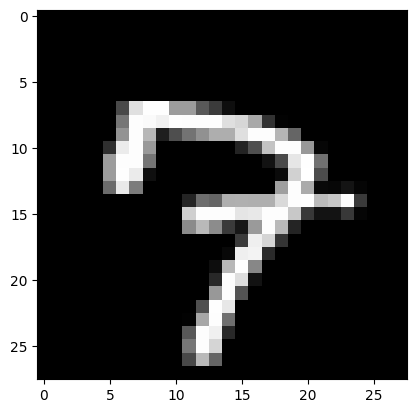

Label: 7.0


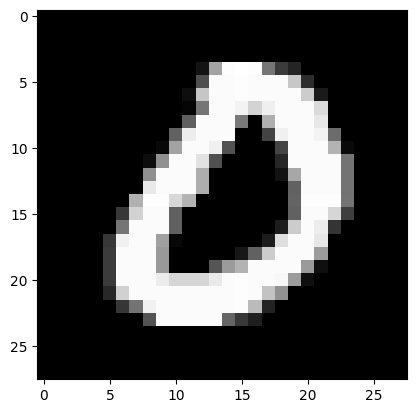

Label: 0.0


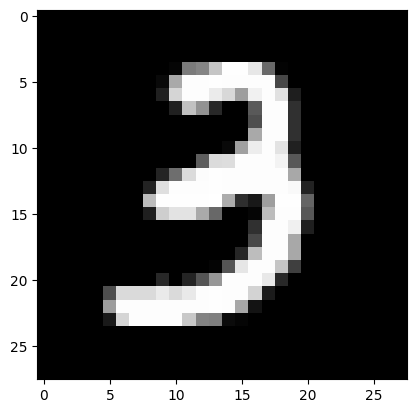

Label: 3.0


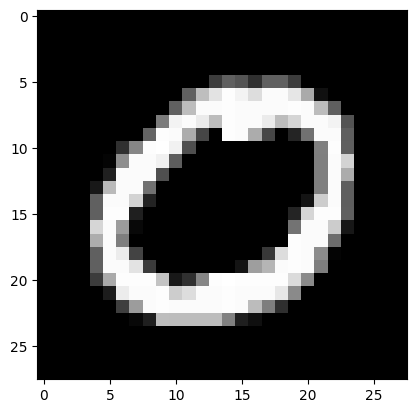

Label: 0.0


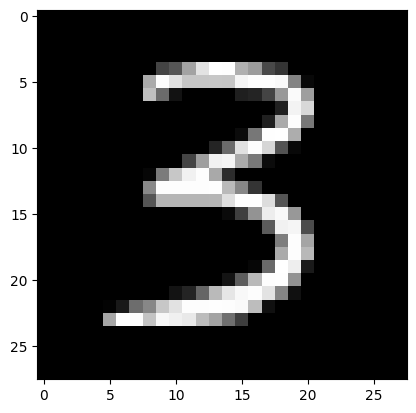

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 70:30 and K=5**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.70)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

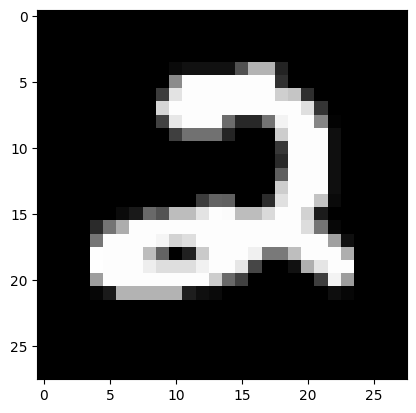

Label: 2.0


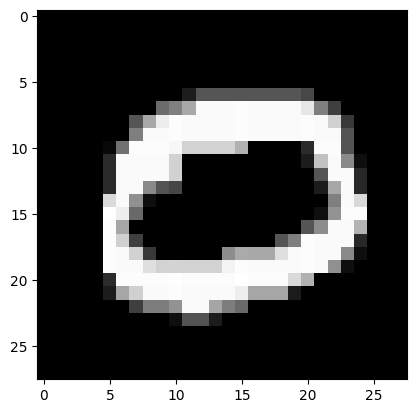

Label: 0.0


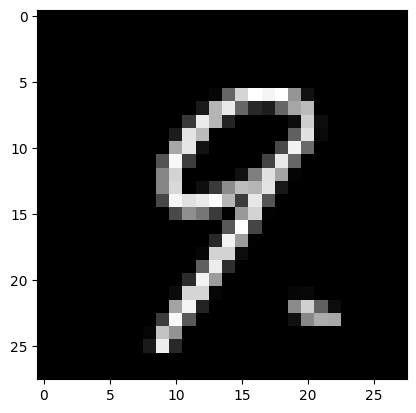

Label: 9.0


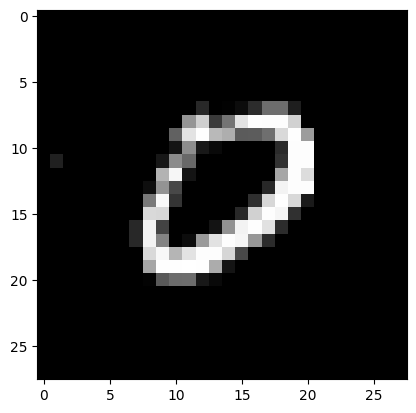

Label: 9.0


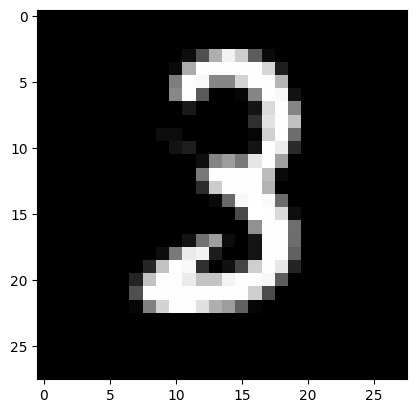

Label: 3.0


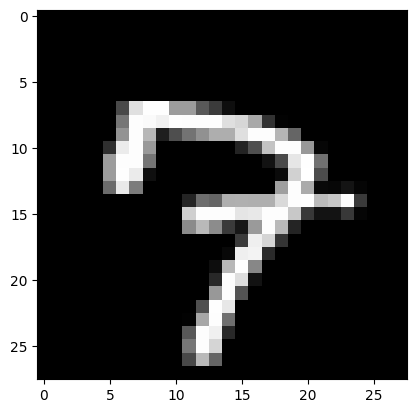

Label: 7.0


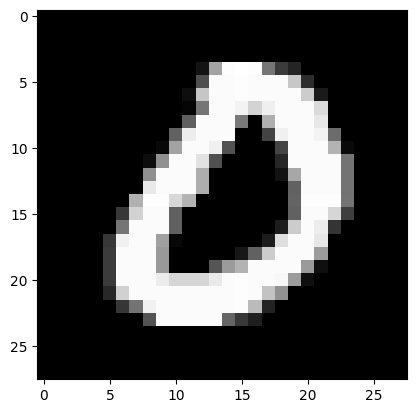

Label: 0.0


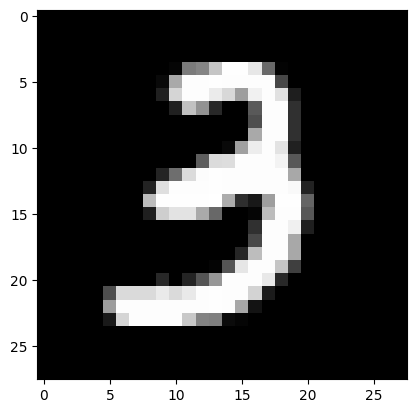

Label: 3.0


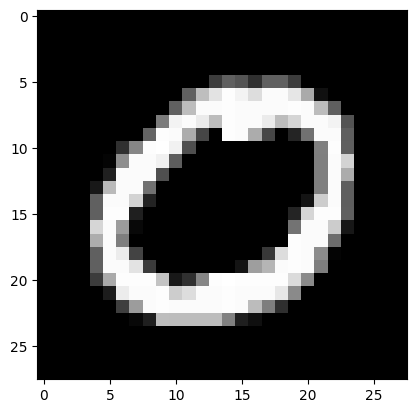

Label: 0.0


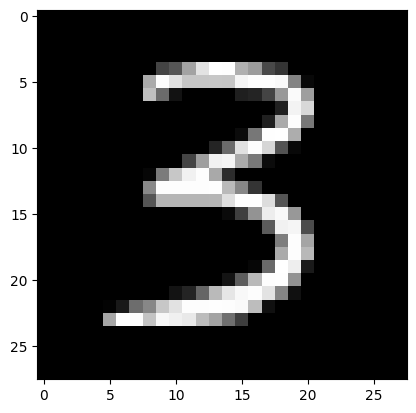

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 70:30 and K=6**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.70)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=6)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

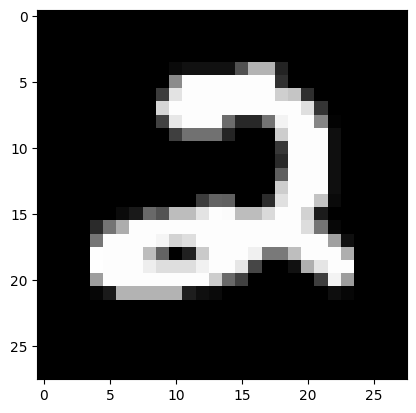

Label: 2.0


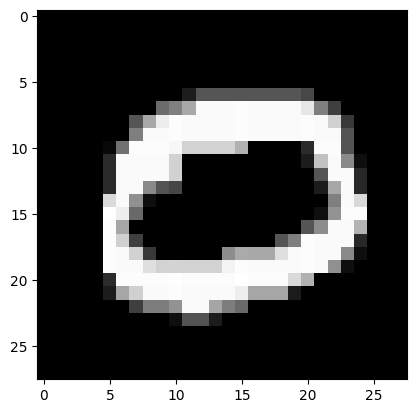

Label: 0.0


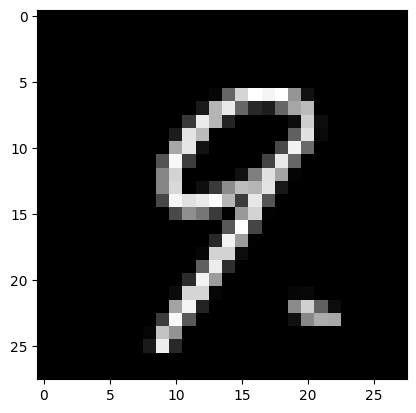

Label: 9.0


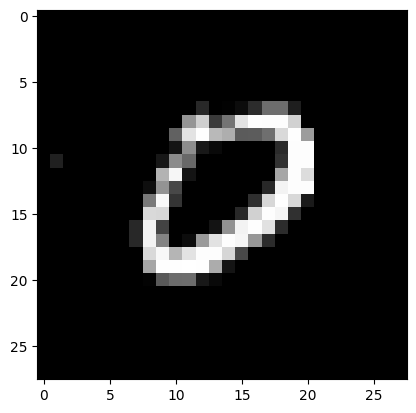

Label: 9.0


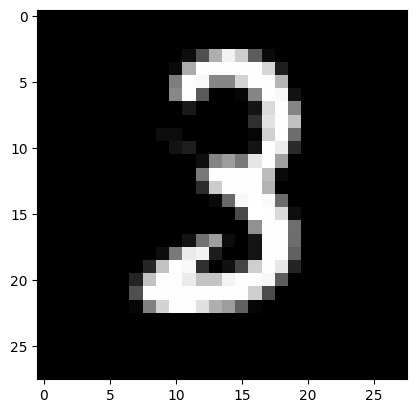

Label: 3.0


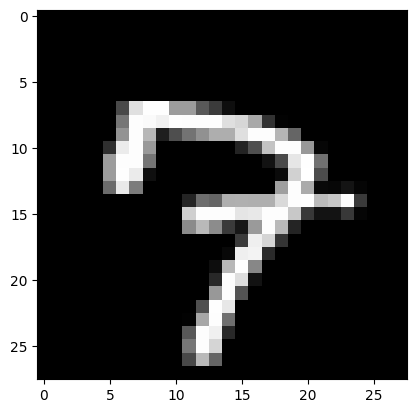

Label: 7.0


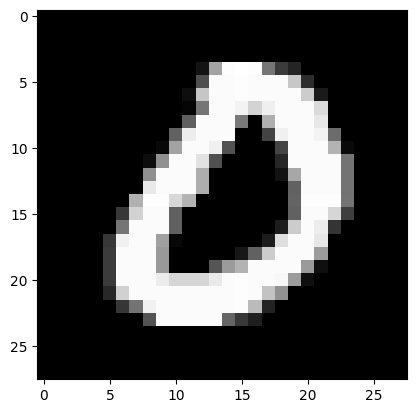

Label: 0.0


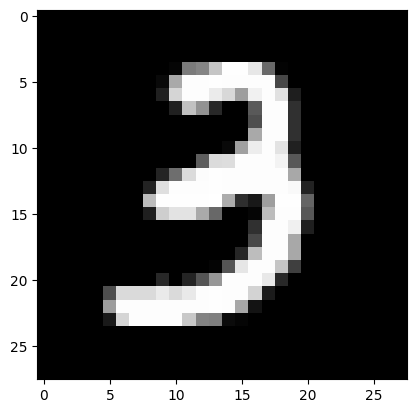

Label: 3.0


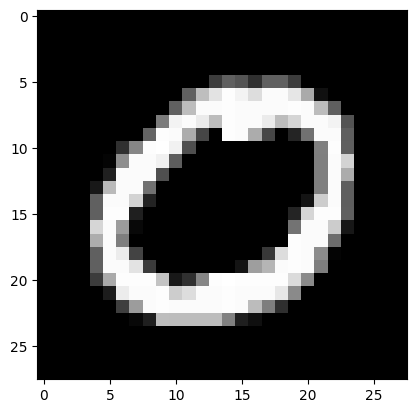

Label: 0.0


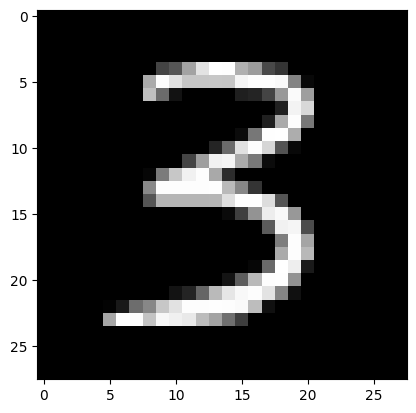

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 70:30 and K=7**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.70)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=7)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

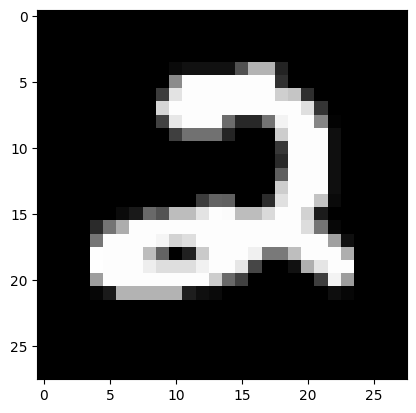

Label: 2.0


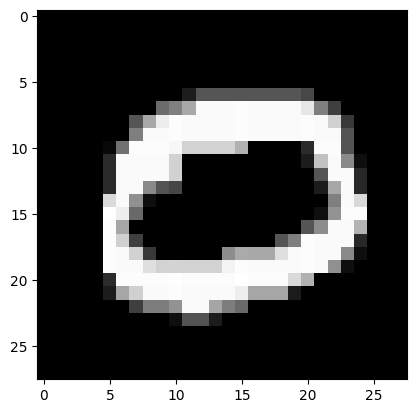

Label: 0.0


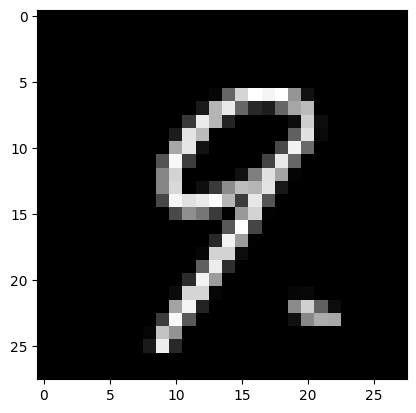

Label: 9.0


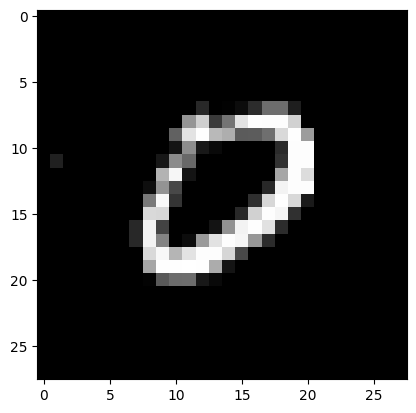

Label: 9.0


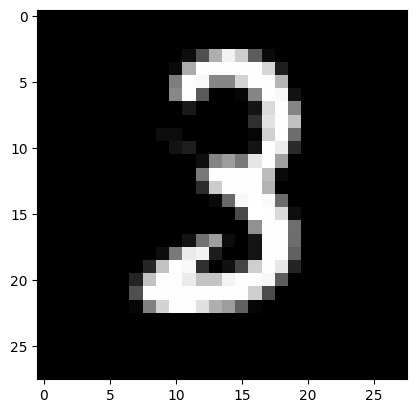

Label: 3.0


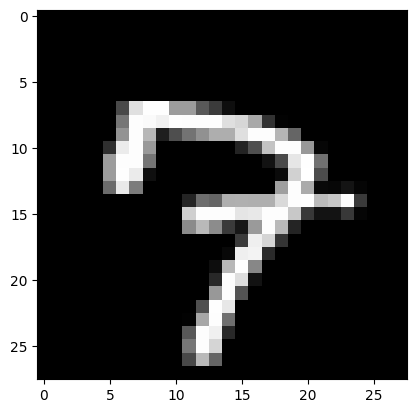

Label: 7.0


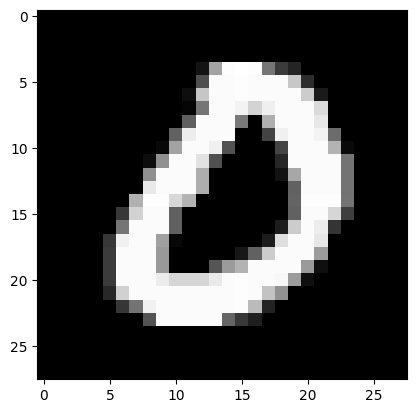

Label: 0.0


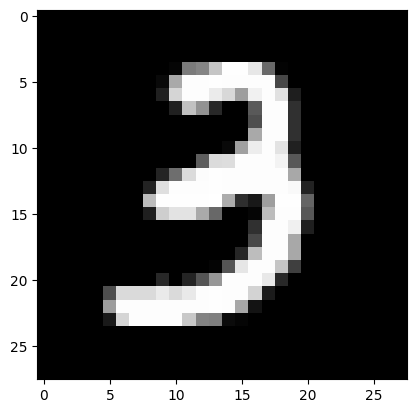

Label: 3.0


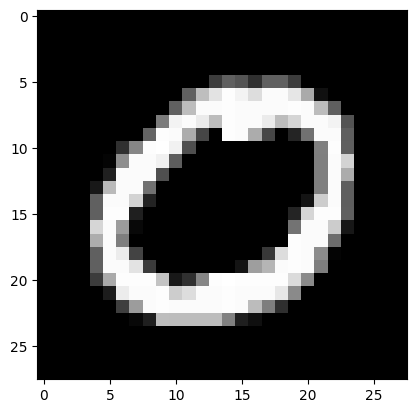

Label: 0.0


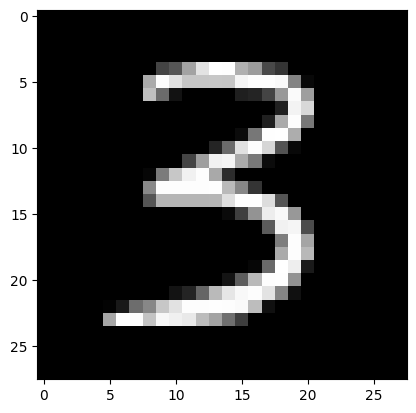

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 70:30 and K=10**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.70)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=10)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

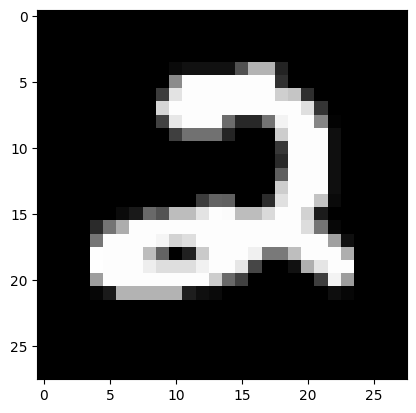

Label: 2.0


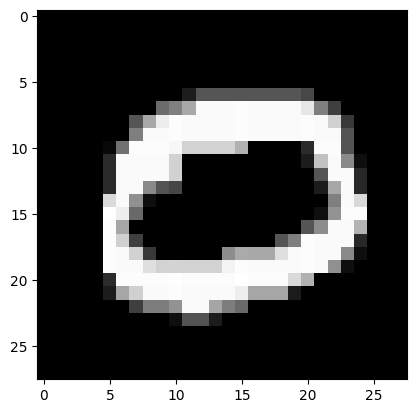

Label: 0.0


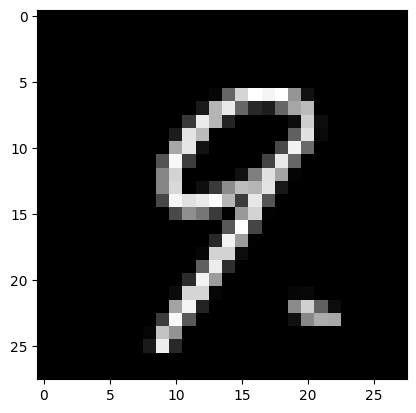

Label: 9.0


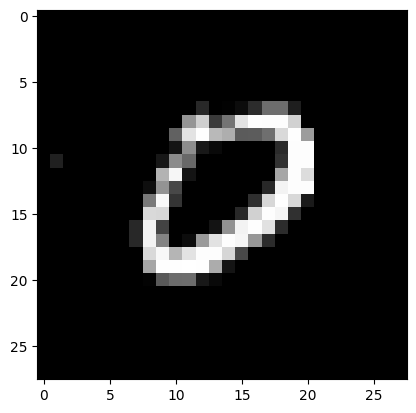

Label: 9.0


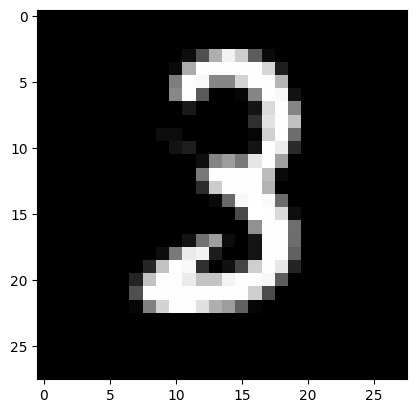

Label: 3.0


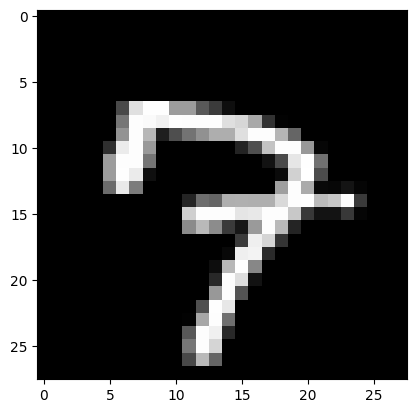

Label: 7.0


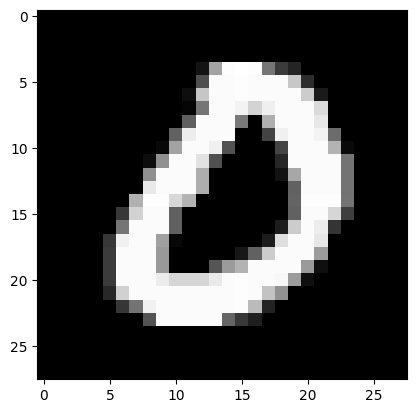

Label: 0.0


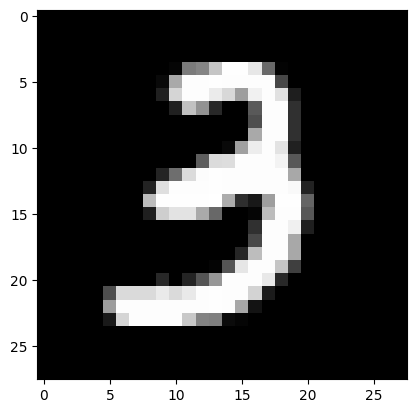

Label: 3.0


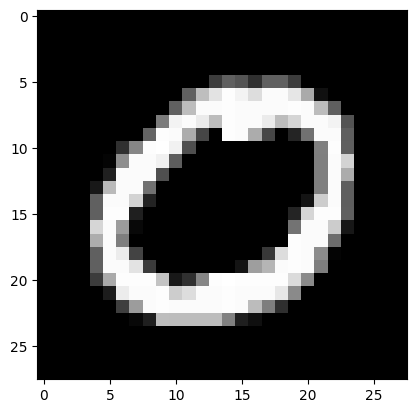

Label: 0.0


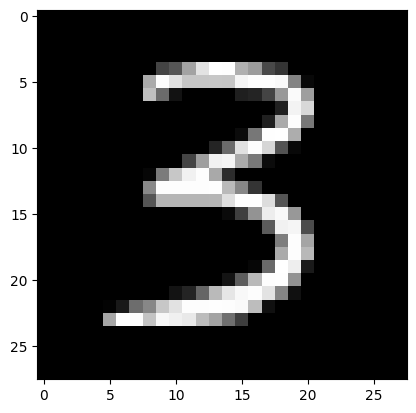

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 75:25 and K=2**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.75)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=2)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

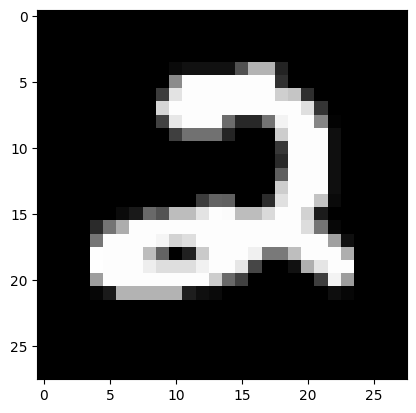

Label: 2.0


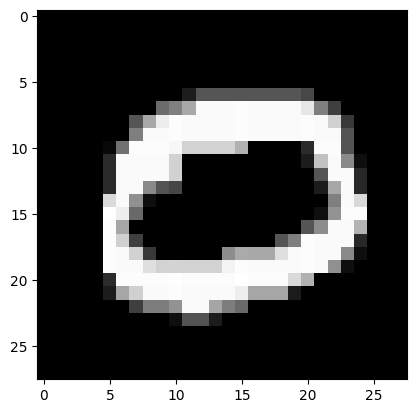

Label: 0.0


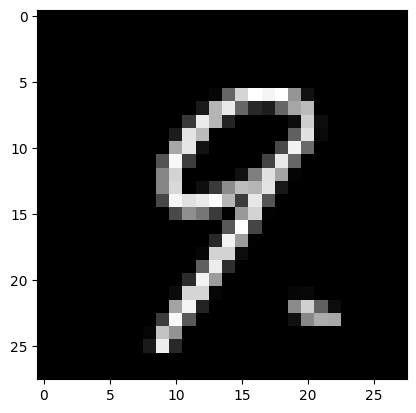

Label: 9.0


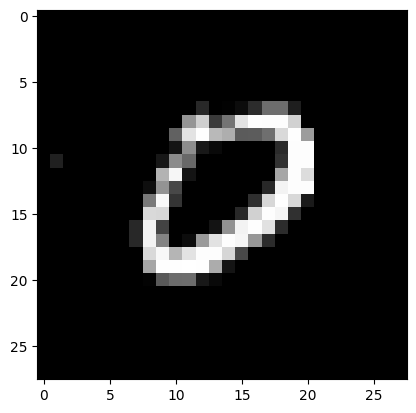

Label: 9.0


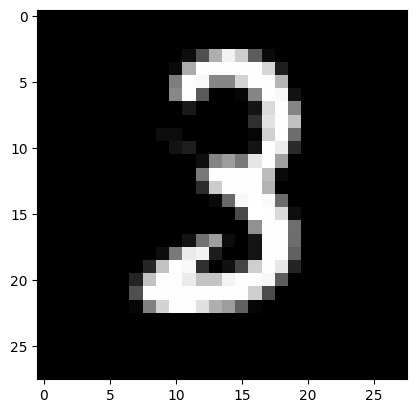

Label: 3.0


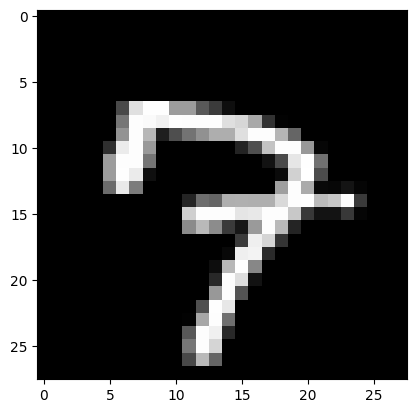

Label: 7.0


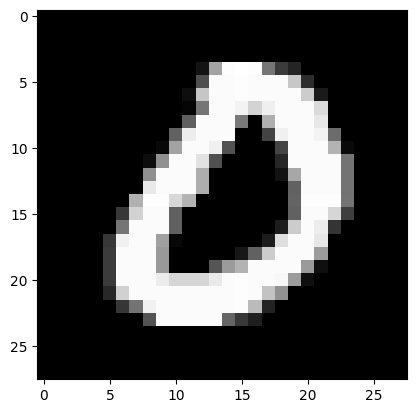

Label: 0.0


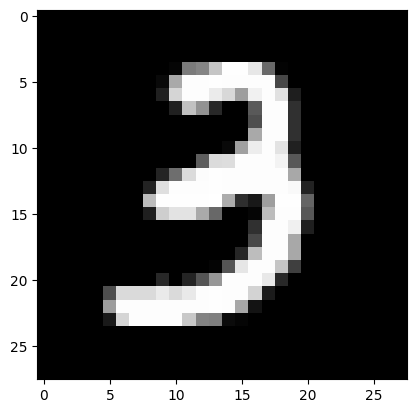

Label: 3.0


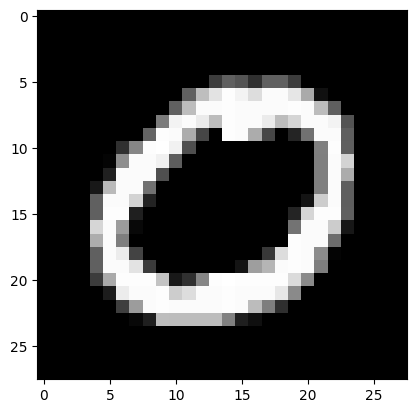

Label: 0.0


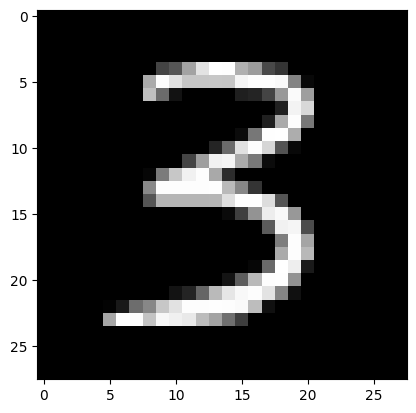

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 75:25 and K=4**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.75)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=4)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

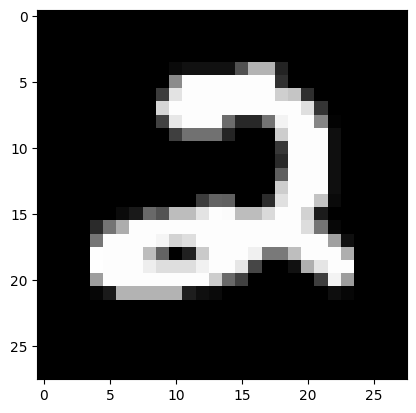

Label: 2.0


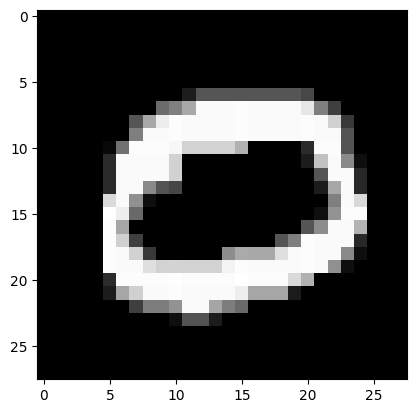

Label: 0.0


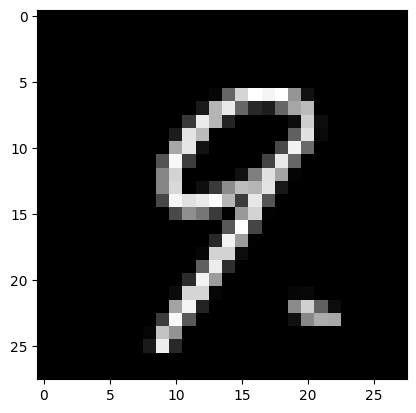

Label: 9.0


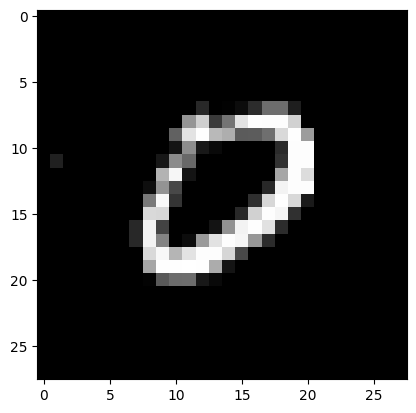

Label: 9.0


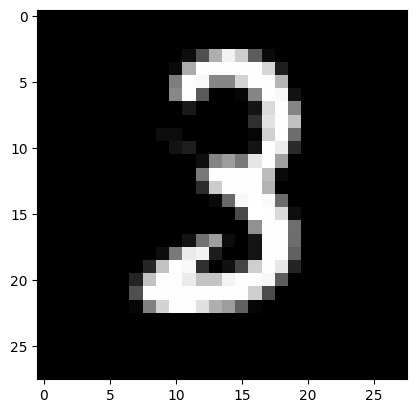

Label: 3.0


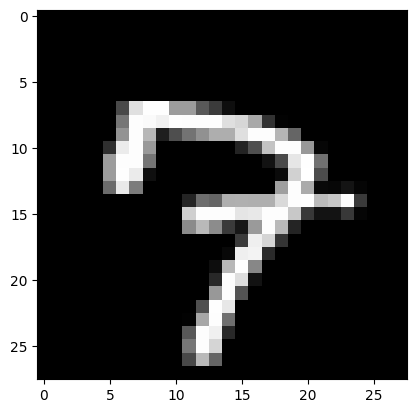

Label: 7.0


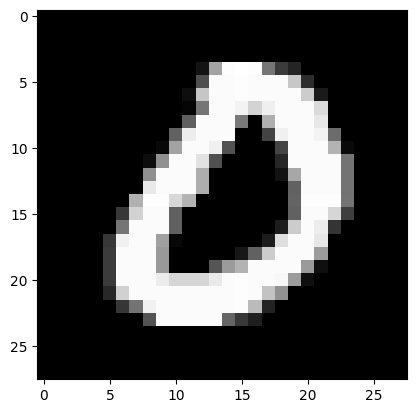

Label: 0.0


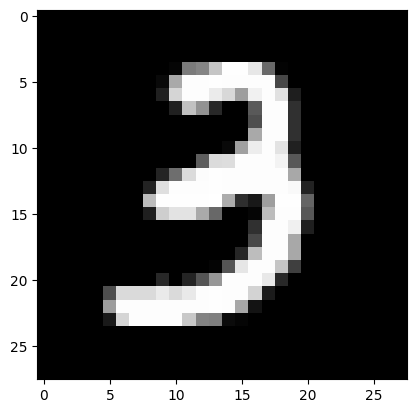

Label: 3.0


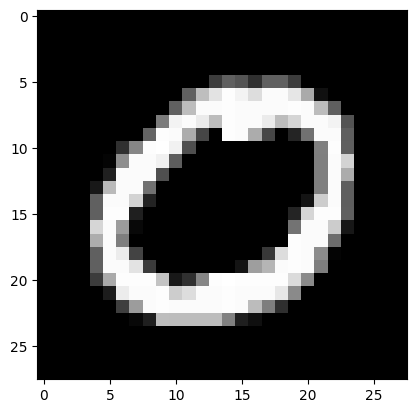

Label: 0.0


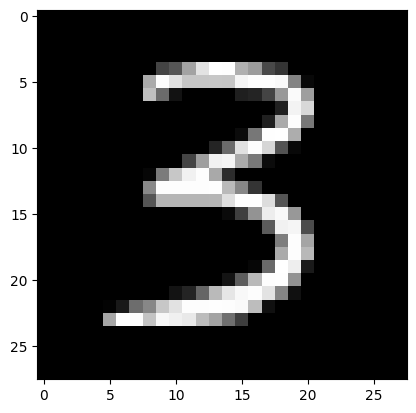

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 75:25 and K=5**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.75)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

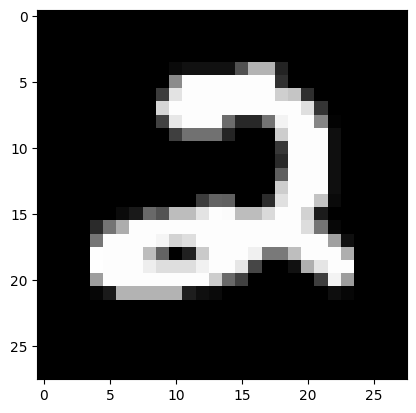

Label: 2.0


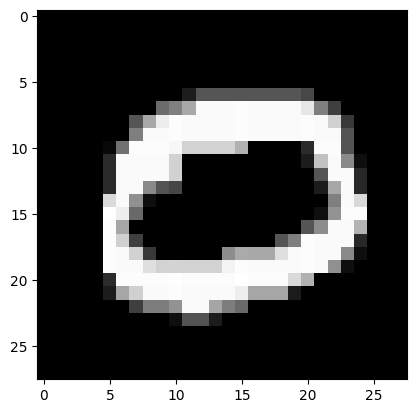

Label: 0.0


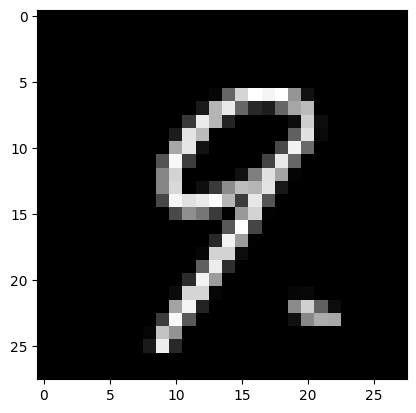

Label: 9.0


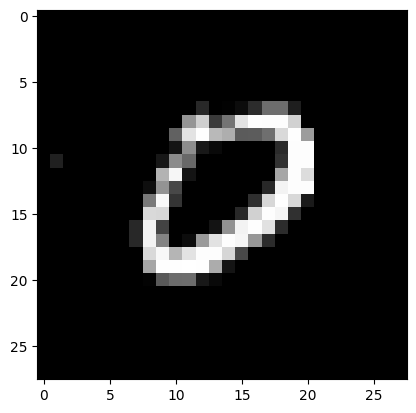

Label: 9.0


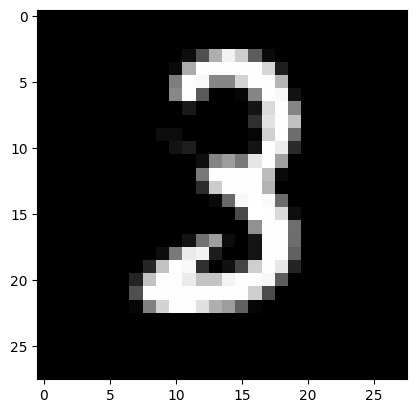

Label: 3.0


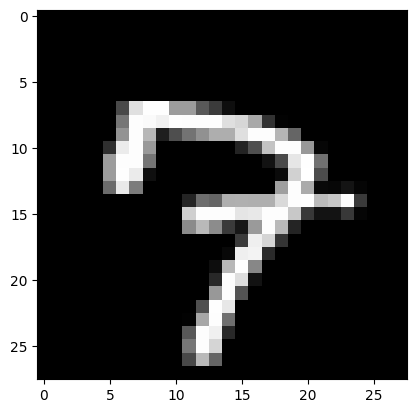

Label: 7.0


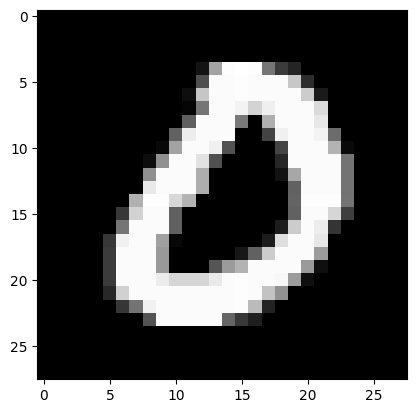

Label: 0.0


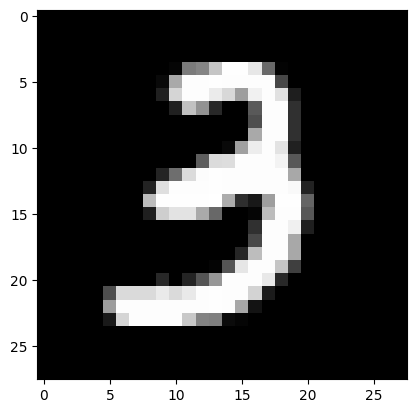

Label: 3.0


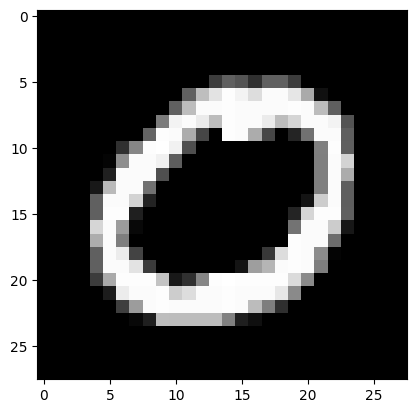

Label: 0.0


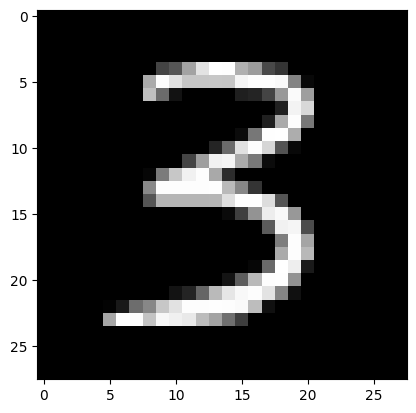

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 75:25 and K=6**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.75)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=6)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

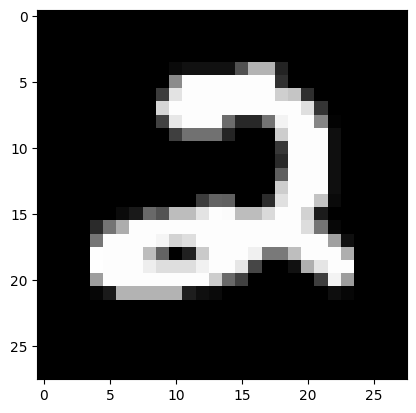

Label: 2.0


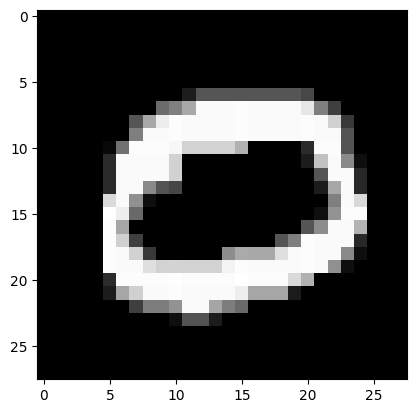

Label: 0.0


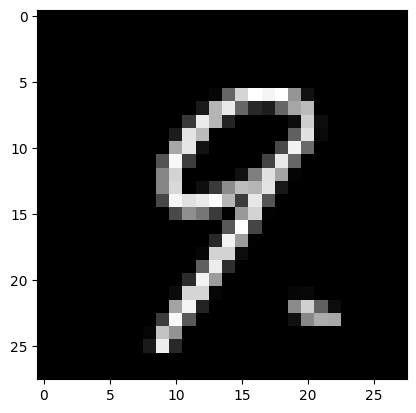

Label: 9.0


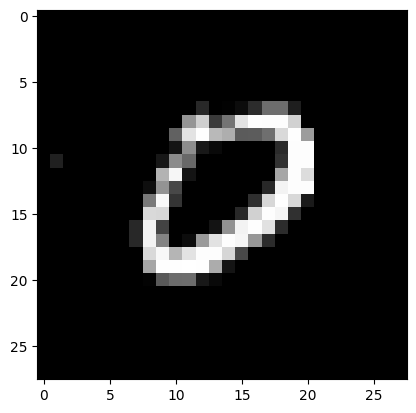

Label: 9.0


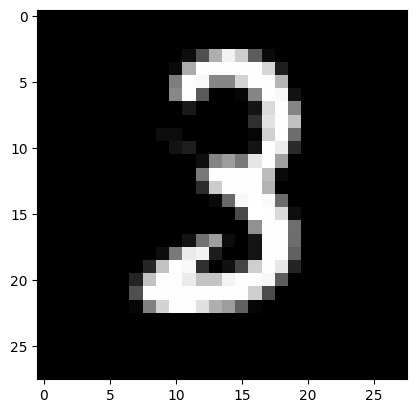

Label: 3.0


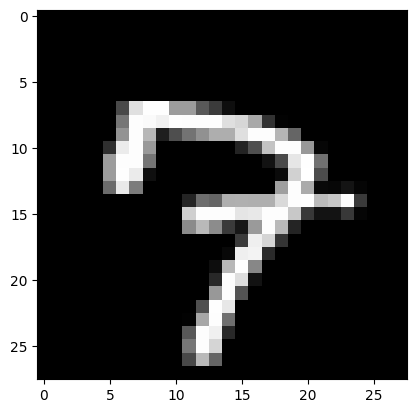

Label: 7.0


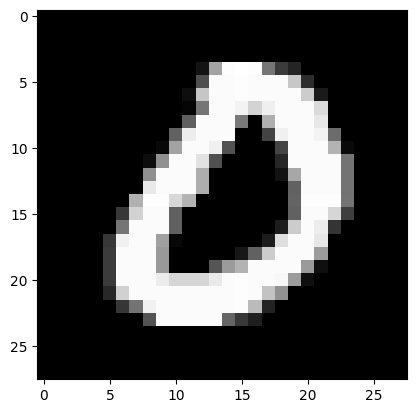

Label: 0.0


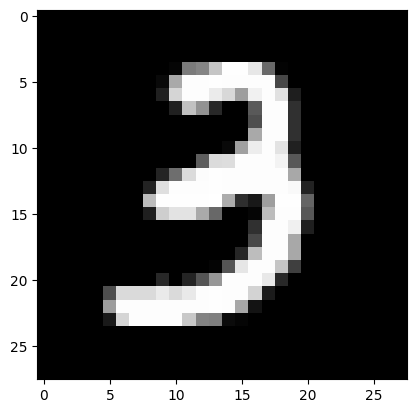

Label: 3.0


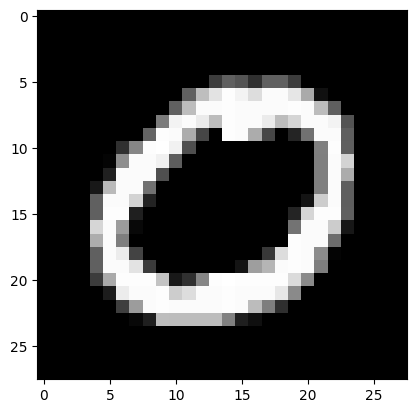

Label: 0.0


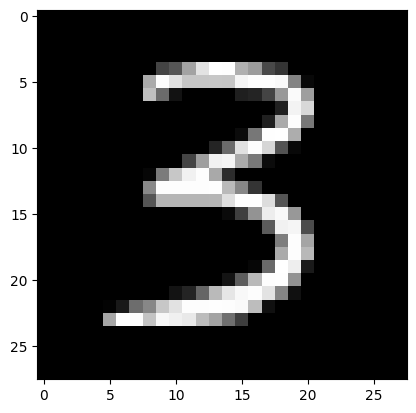

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 75:25 and K=7**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.75)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=7)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

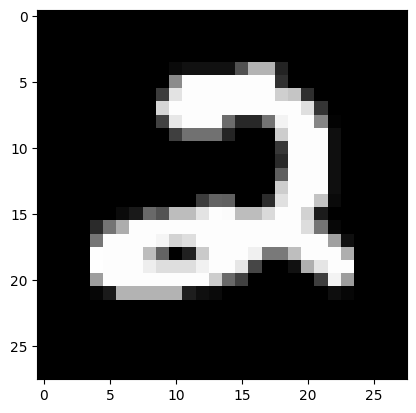

Label: 2.0


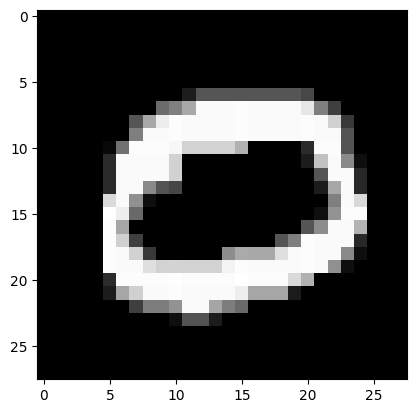

Label: 0.0


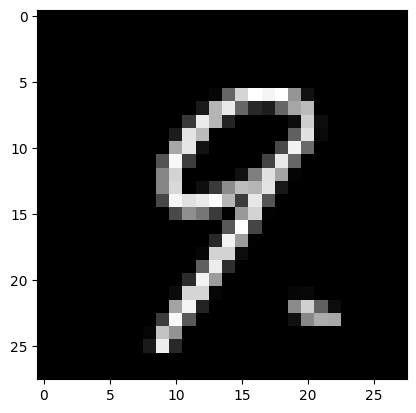

Label: 9.0


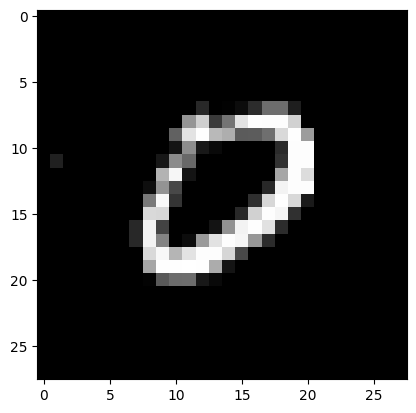

Label: 9.0


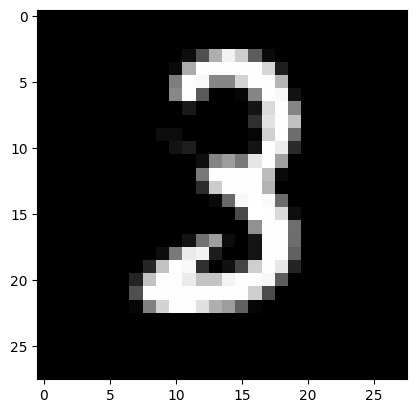

Label: 3.0


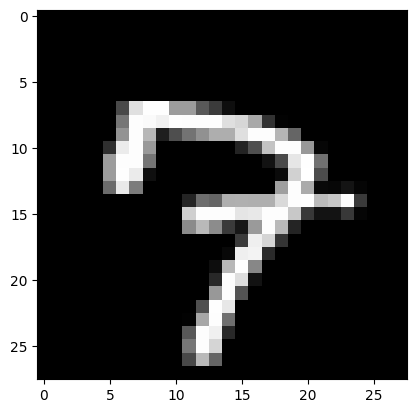

Label: 7.0


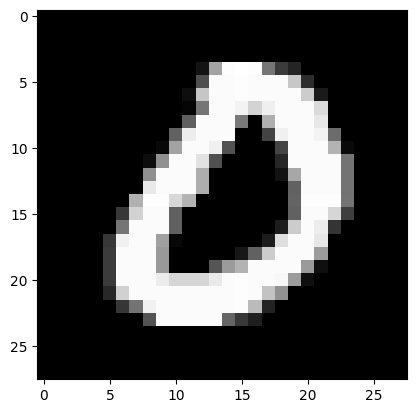

Label: 0.0


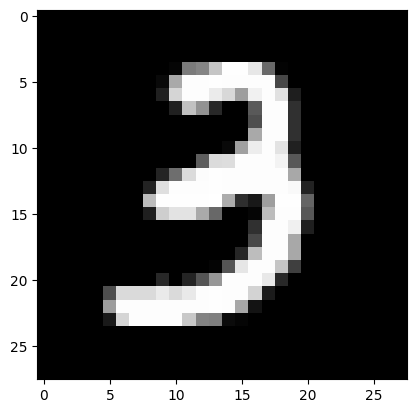

Label: 3.0


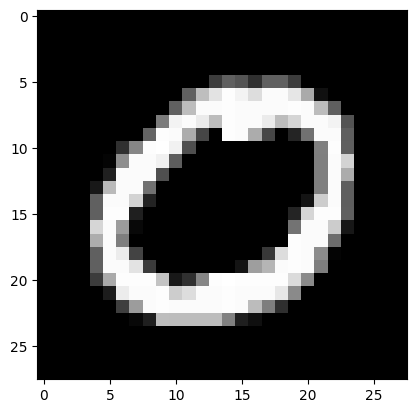

Label: 0.0


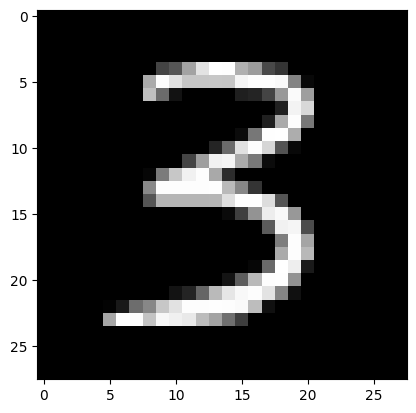

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 75:25 and K=10**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.75)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=10)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

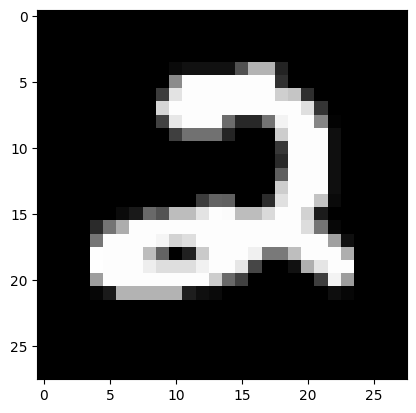

Label: 2.0


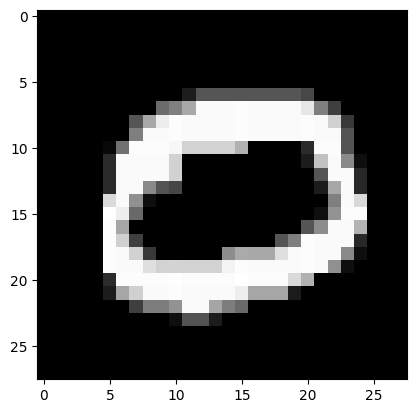

Label: 0.0


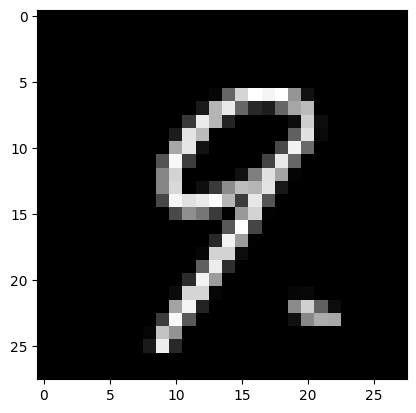

Label: 9.0


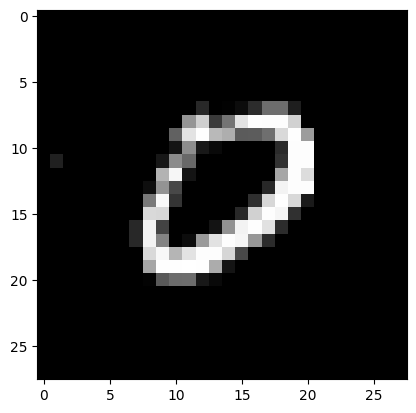

Label: 9.0


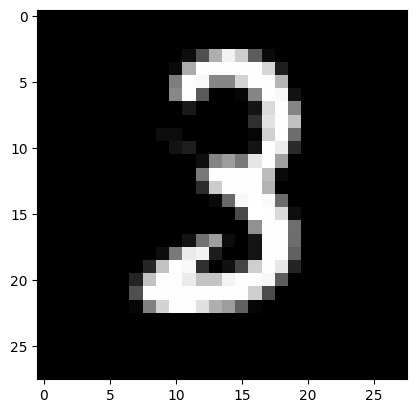

Label: 3.0


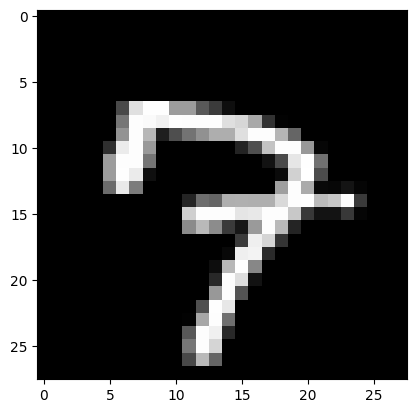

Label: 7.0


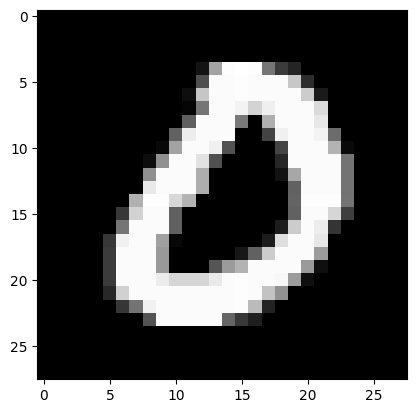

Label: 0.0


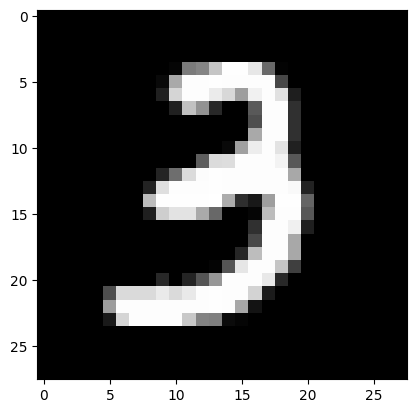

Label: 3.0


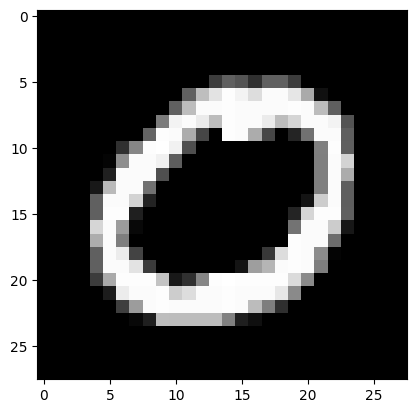

Label: 0.0


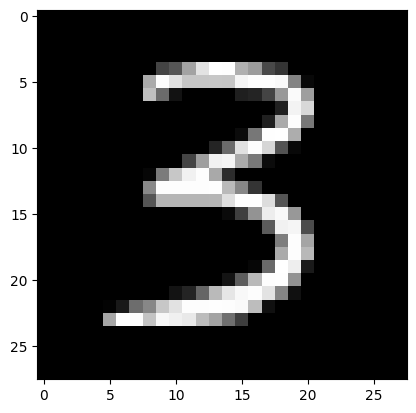

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 80:20 and K=2**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=2)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

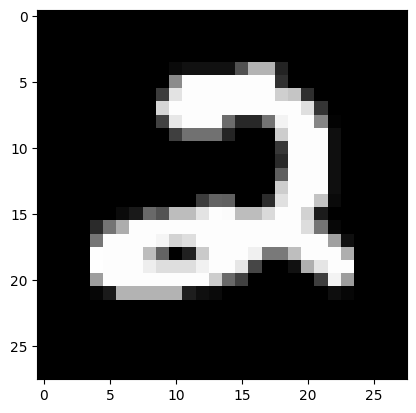

Label: 2.0


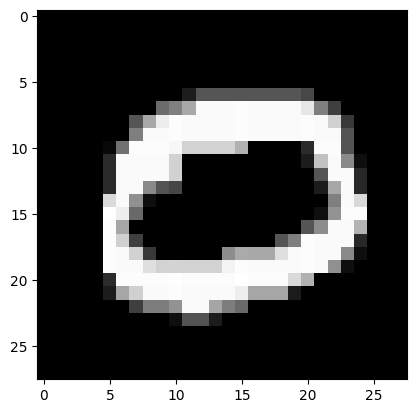

Label: 0.0


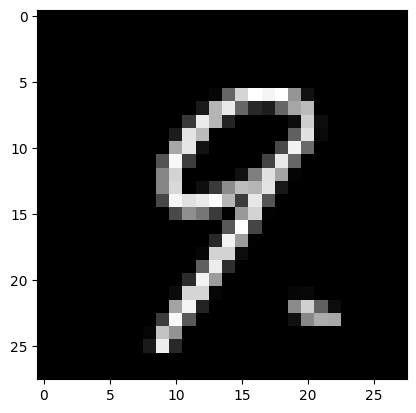

Label: 9.0


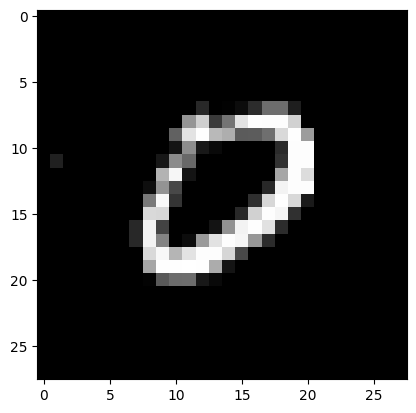

Label: 9.0


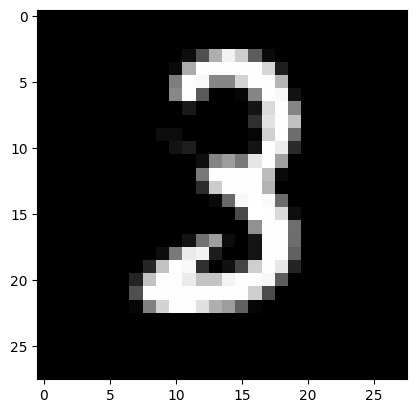

Label: 3.0


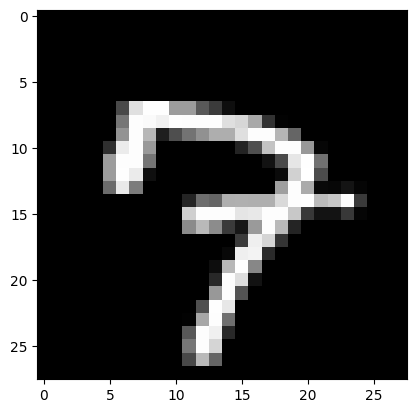

Label: 7.0


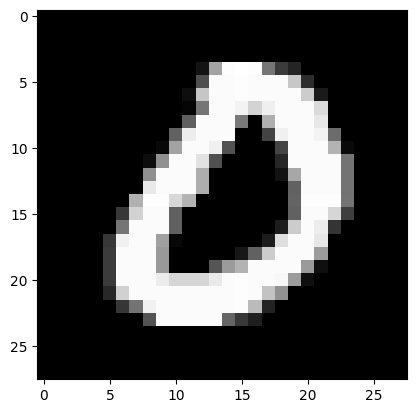

Label: 0.0


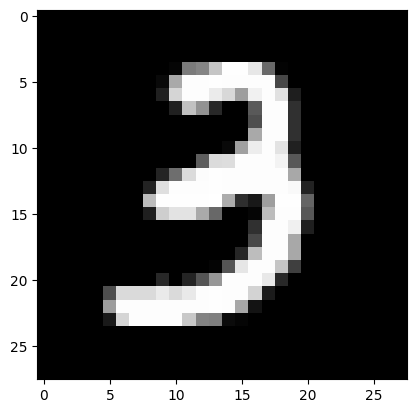

Label: 3.0


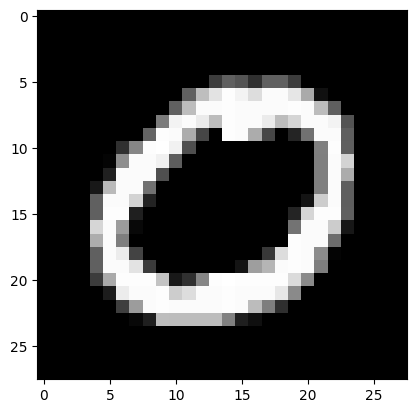

Label: 0.0


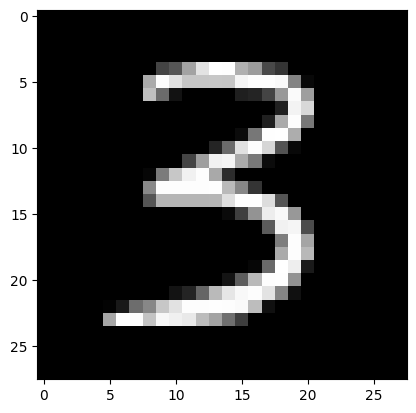

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 80:20 and K=4**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=4)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

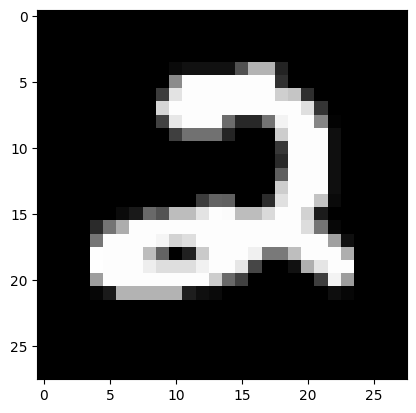

Label: 2.0


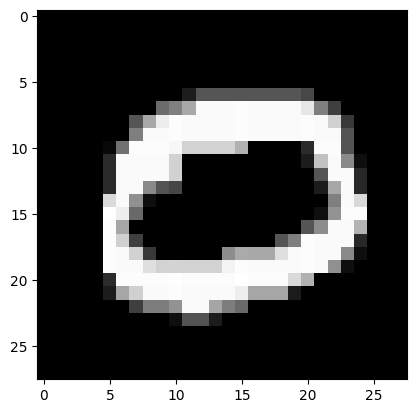

Label: 0.0


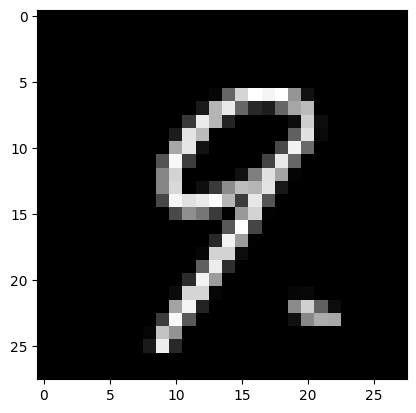

Label: 9.0


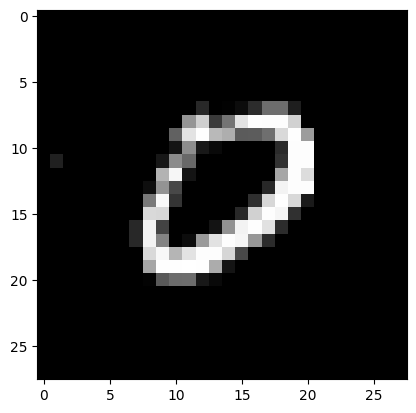

Label: 9.0


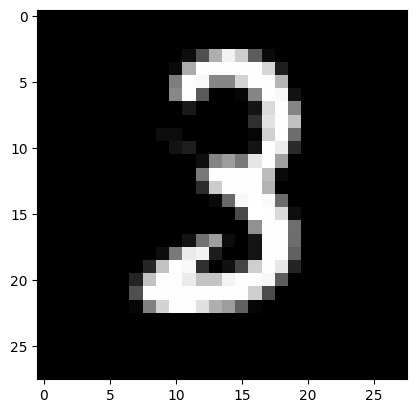

Label: 3.0


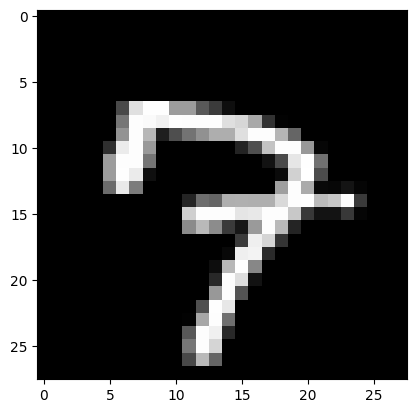

Label: 7.0


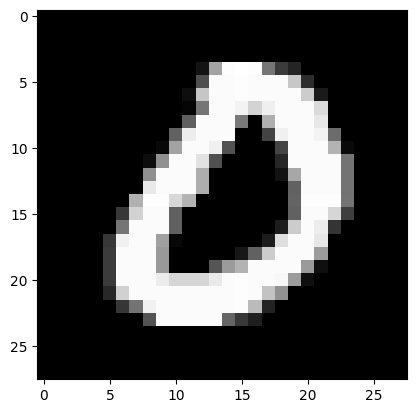

Label: 0.0


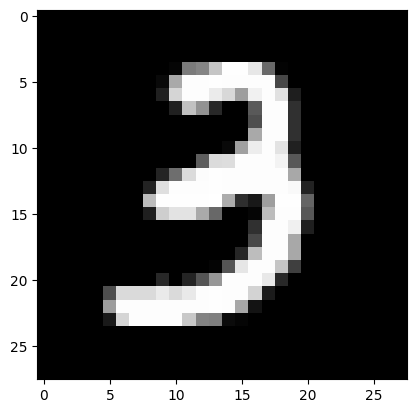

Label: 3.0


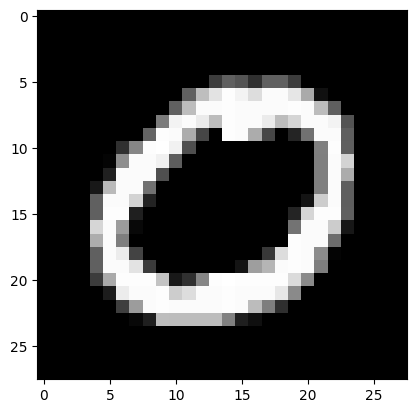

Label: 0.0


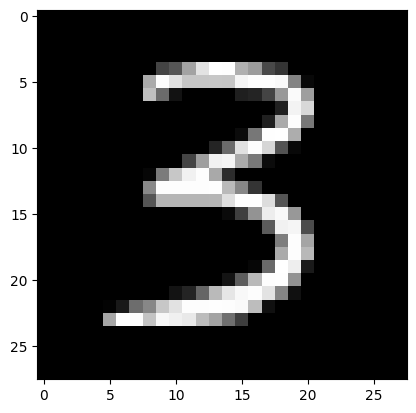

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 80:20 and K=5**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

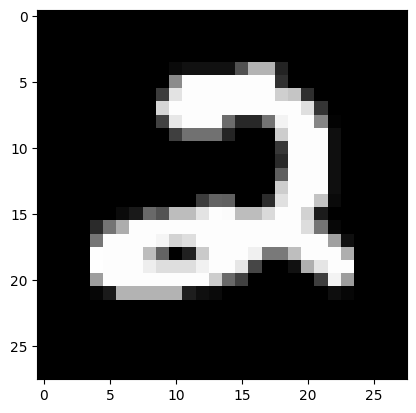

Label: 2.0


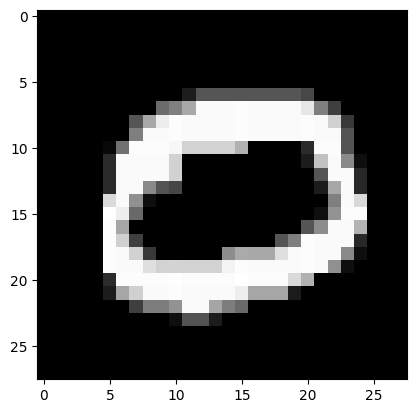

Label: 0.0


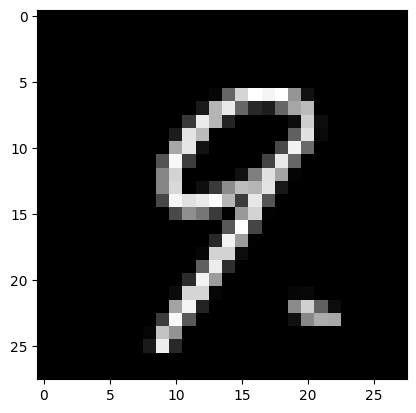

Label: 9.0


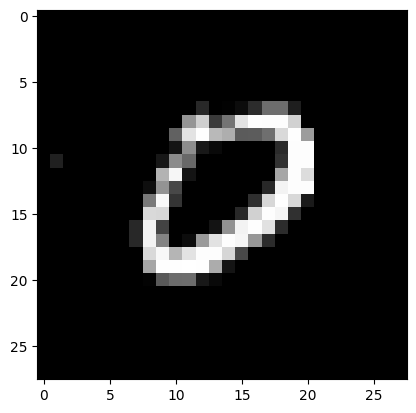

Label: 9.0


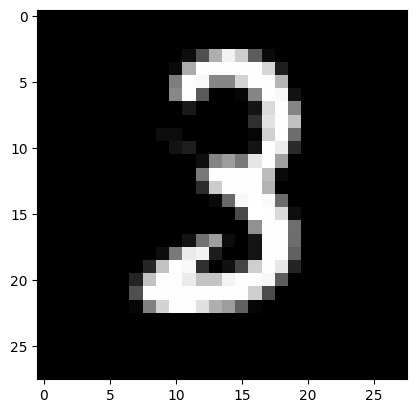

Label: 3.0


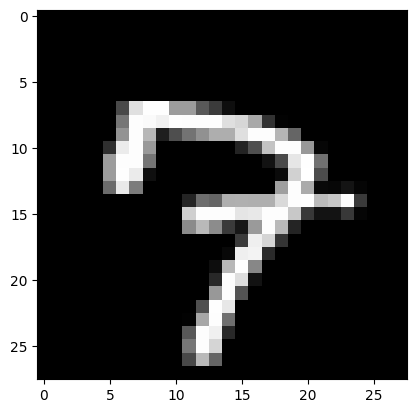

Label: 7.0


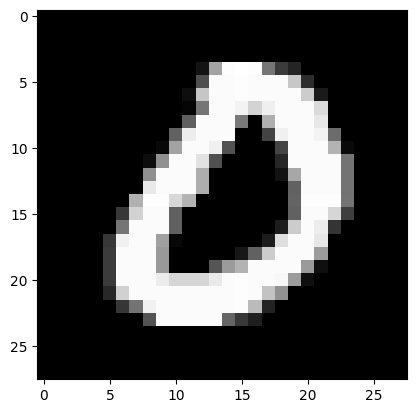

Label: 0.0


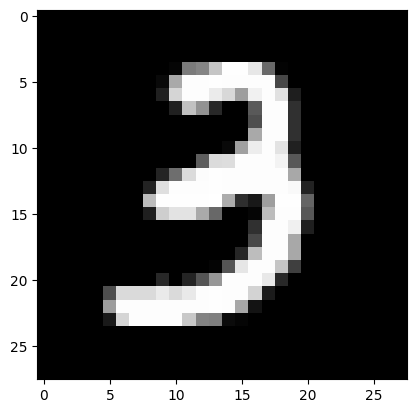

Label: 3.0


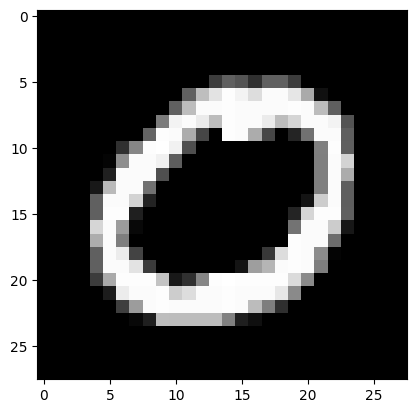

Label: 0.0


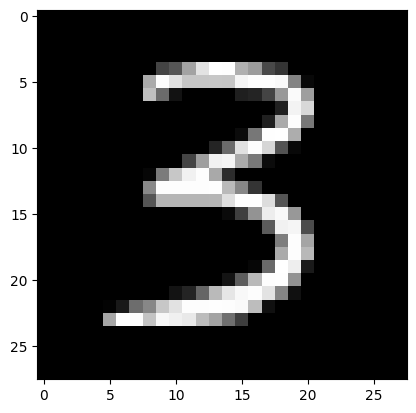

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 80:20 and K=6**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=6)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

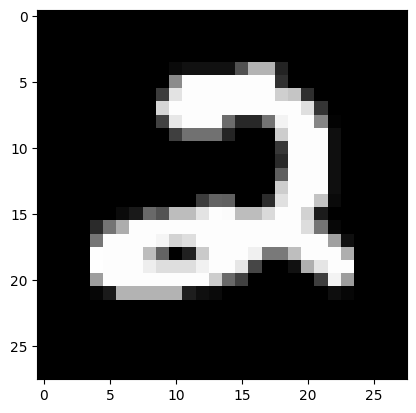

Label: 2.0


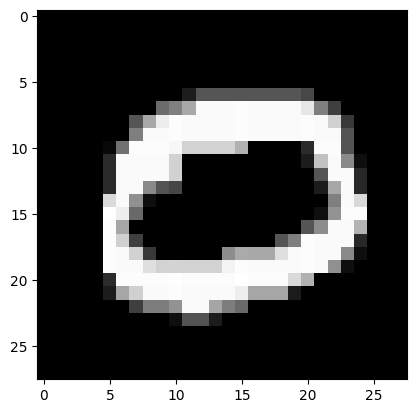

Label: 0.0


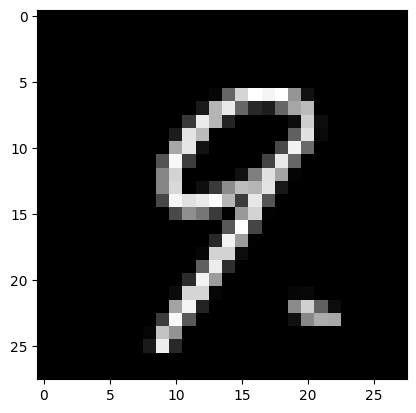

Label: 9.0


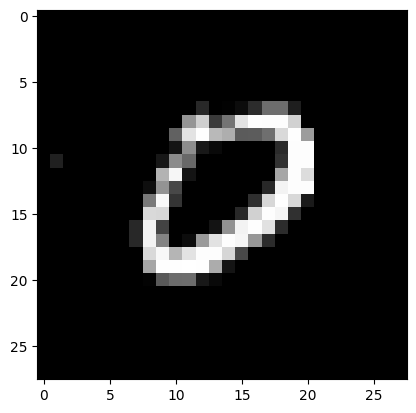

Label: 9.0


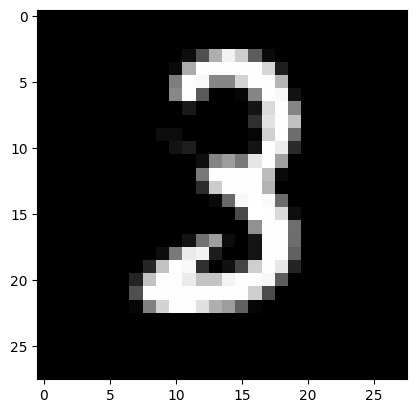

Label: 3.0


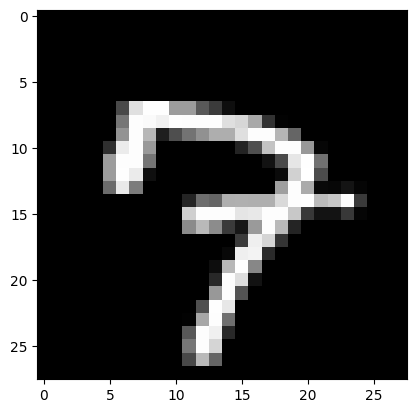

Label: 7.0


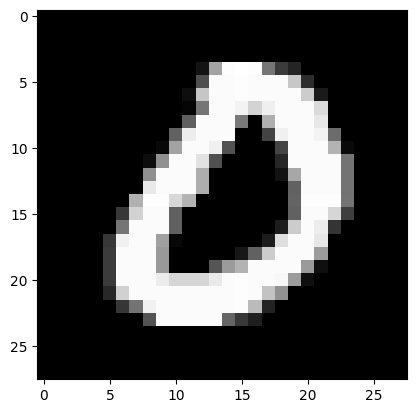

Label: 0.0


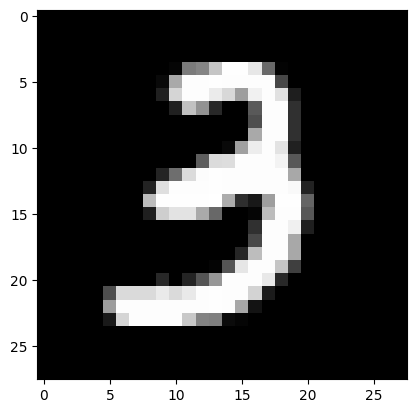

Label: 3.0


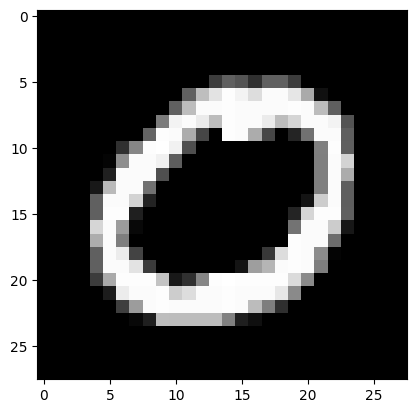

Label: 0.0


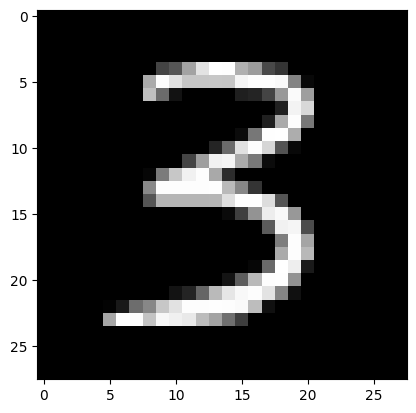

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 80:20 and K=7**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=7)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

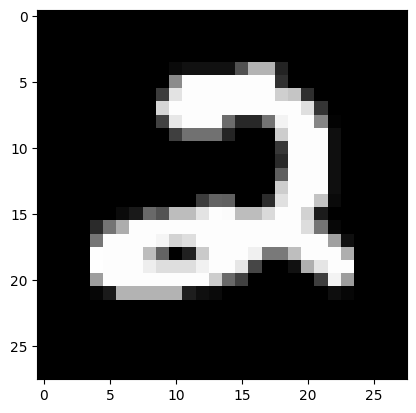

Label: 2.0


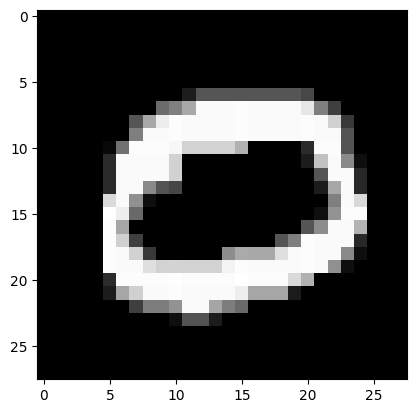

Label: 0.0


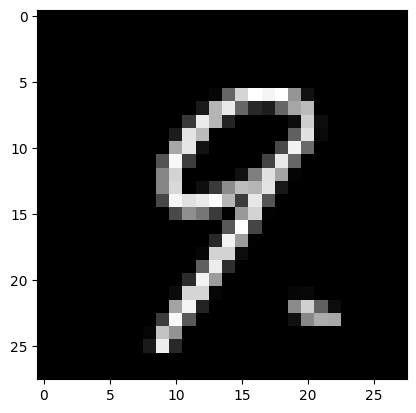

Label: 9.0


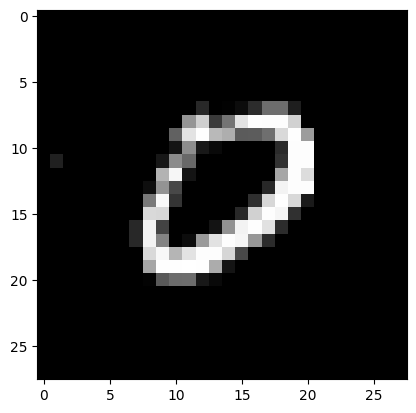

Label: 9.0


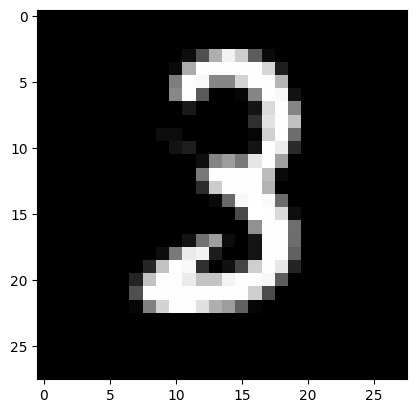

Label: 3.0


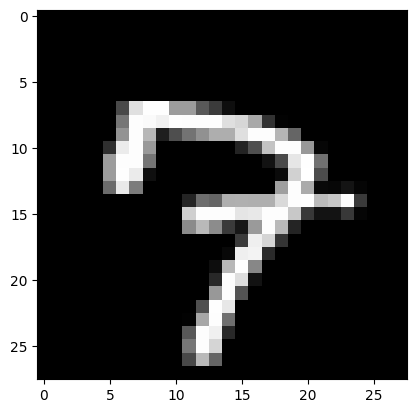

Label: 7.0


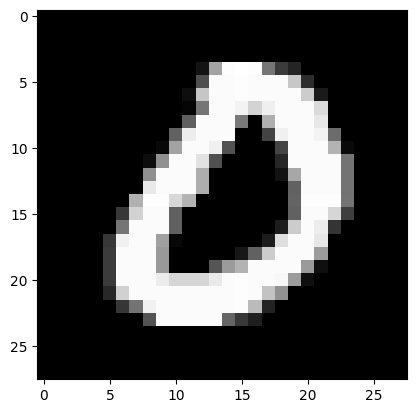

Label: 0.0


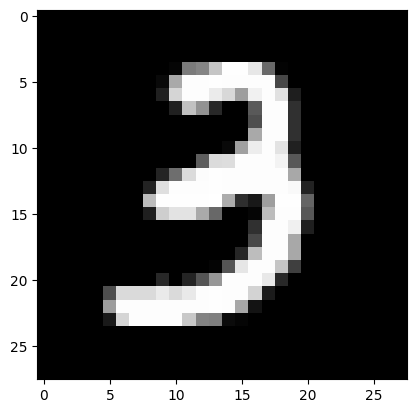

Label: 3.0


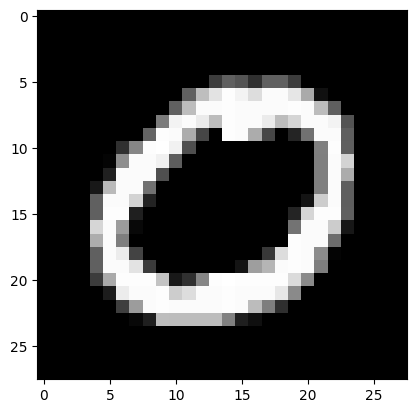

Label: 0.0


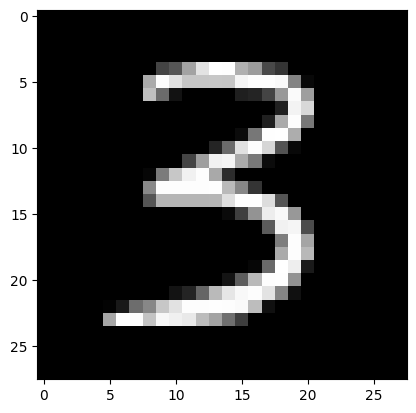

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 80:20 and K=10**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=10)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

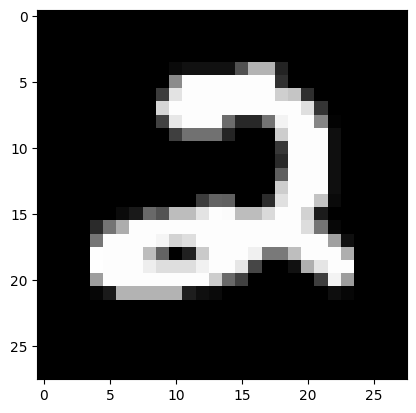

Label: 2.0


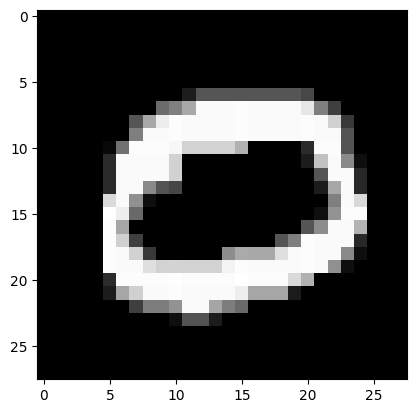

Label: 0.0


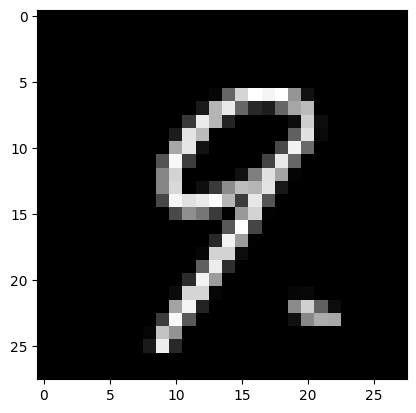

Label: 9.0


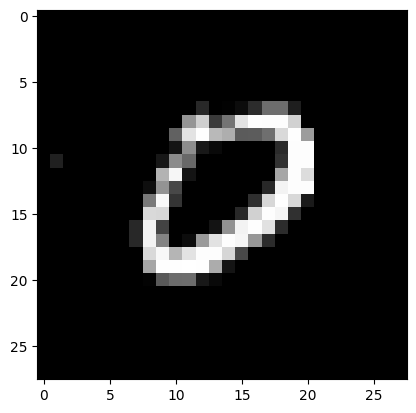

Label: 9.0


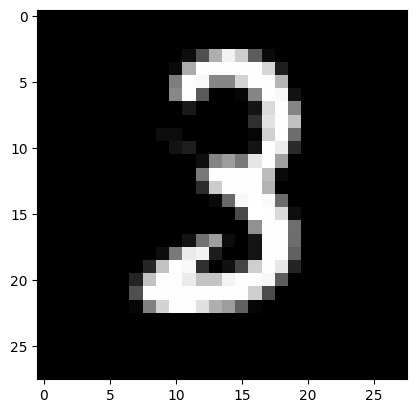

Label: 3.0


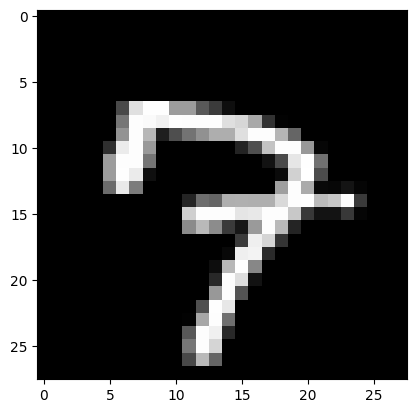

Label: 7.0


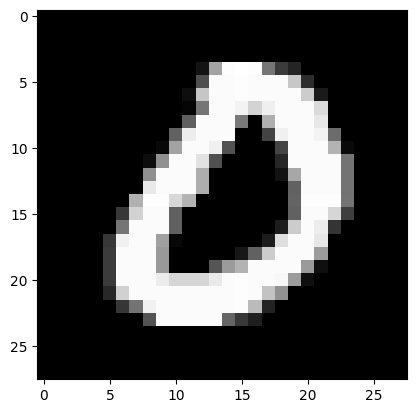

Label: 0.0


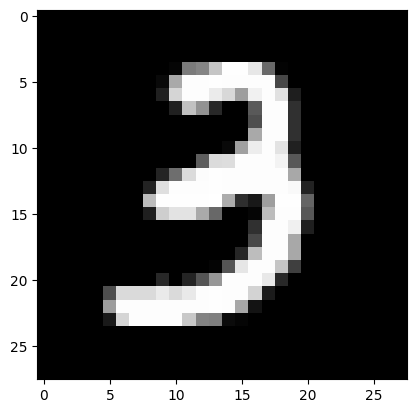

Label: 3.0


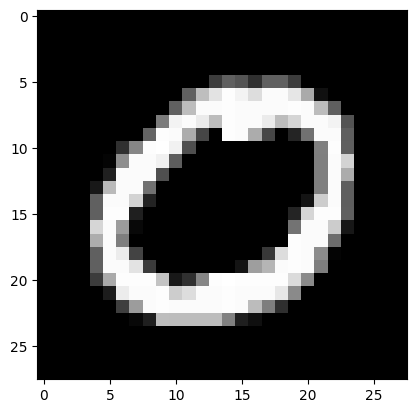

Label: 0.0


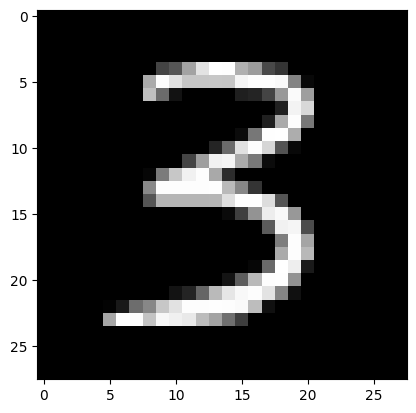

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 90:10 and K=2**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.90)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=2)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

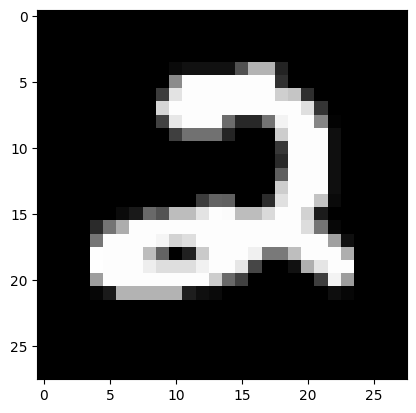

Label: 2.0


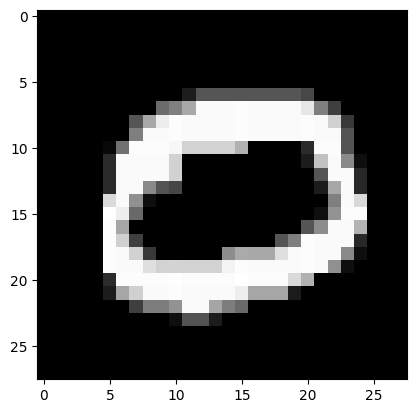

Label: 0.0


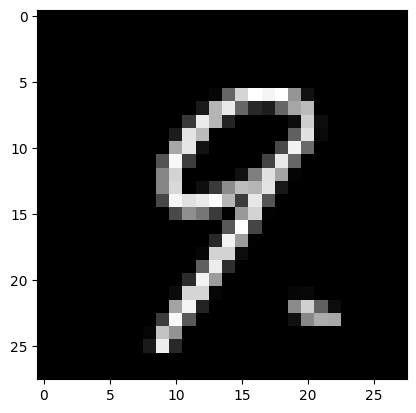

Label: 9.0


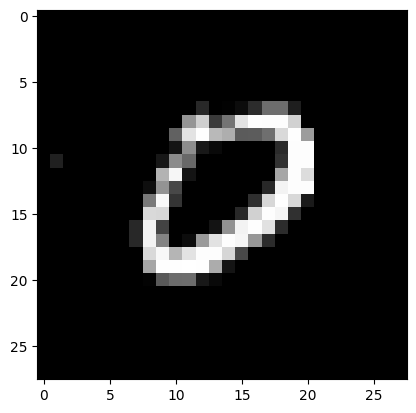

Label: 9.0


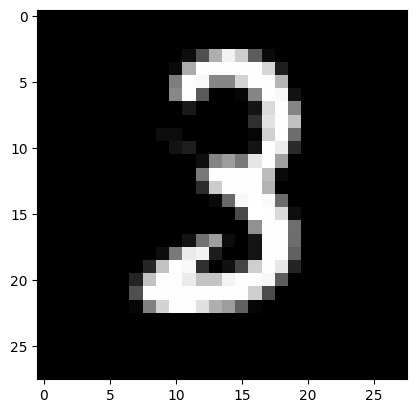

Label: 3.0


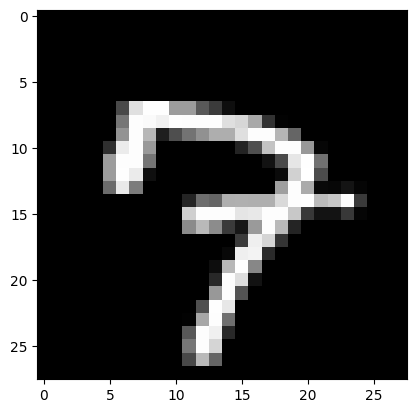

Label: 7.0


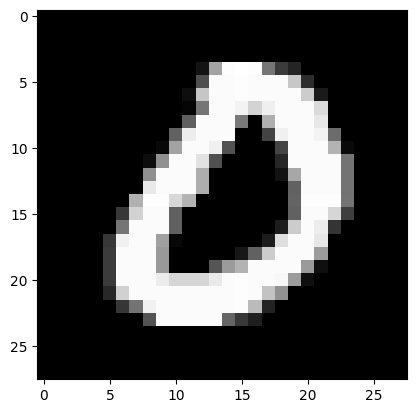

Label: 0.0


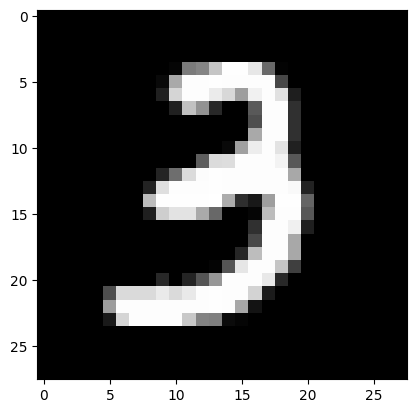

Label: 3.0


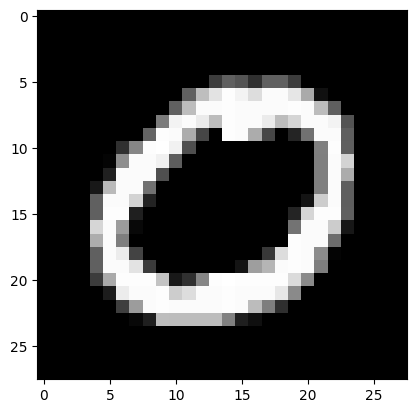

Label: 0.0


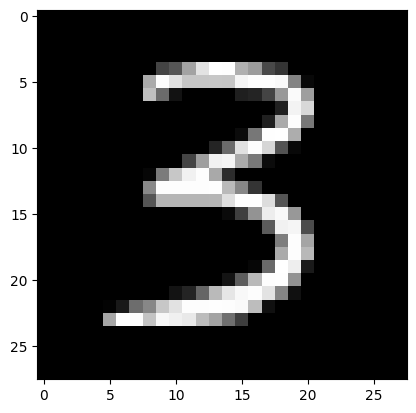

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 90:10 and K=4**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.90)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=4)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

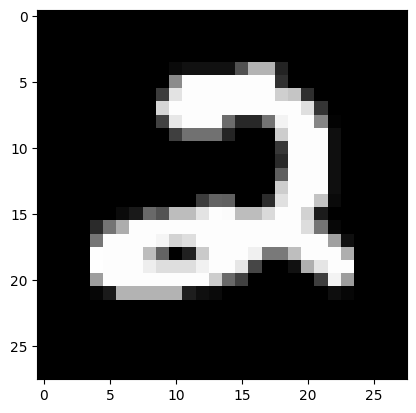

Label: 2.0


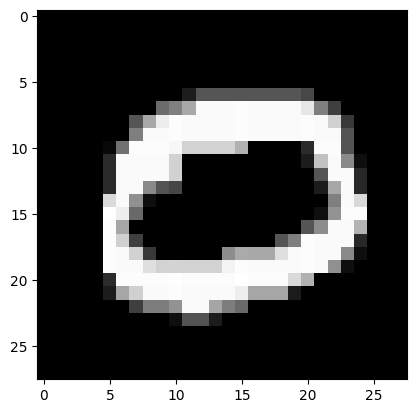

Label: 0.0


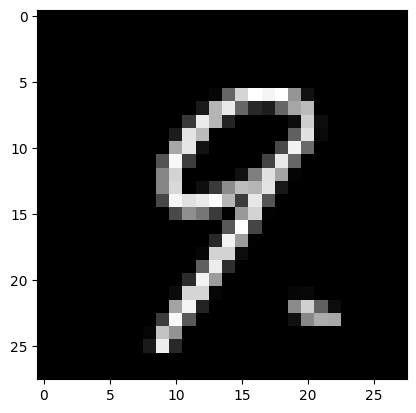

Label: 9.0


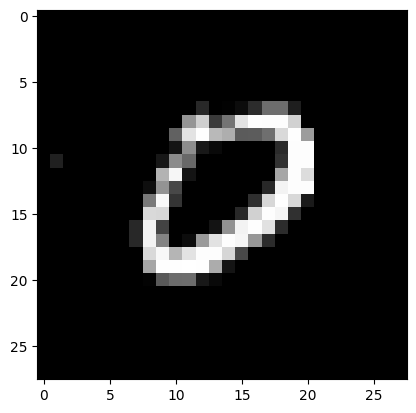

Label: 9.0


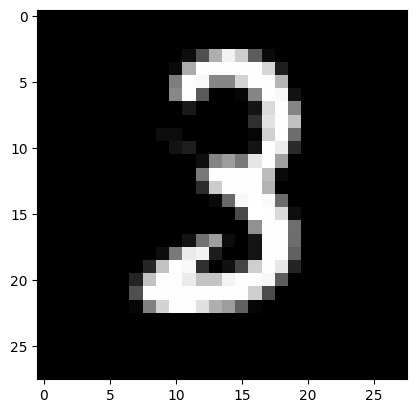

Label: 3.0


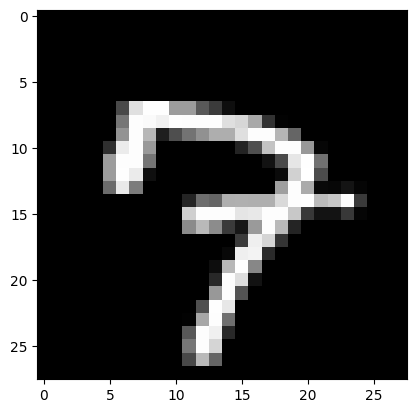

Label: 7.0


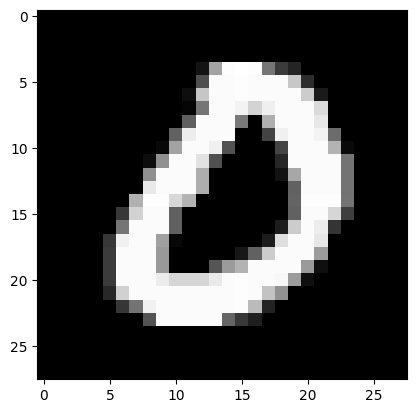

Label: 0.0


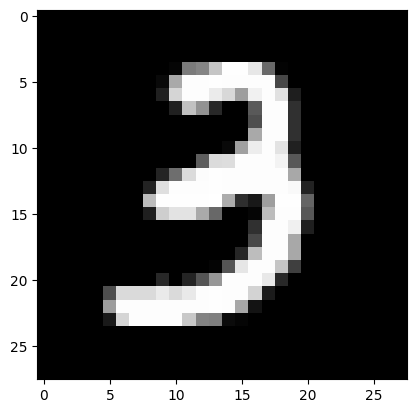

Label: 3.0


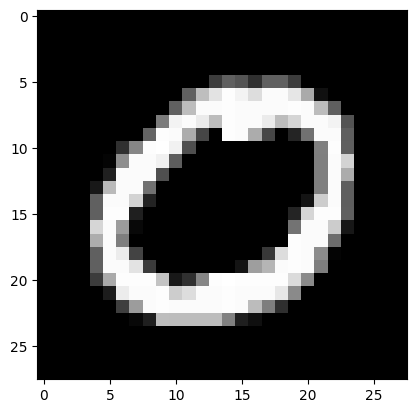

Label: 0.0


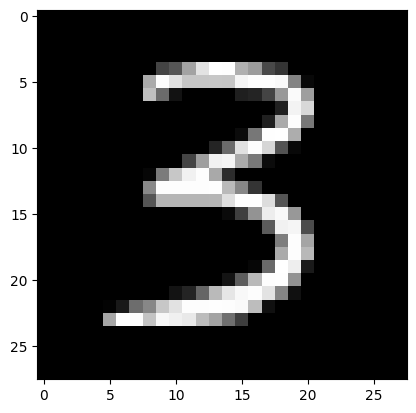

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 90:10 and K=5**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.90)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

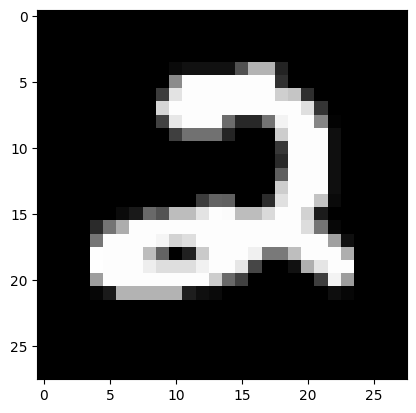

Label: 2.0


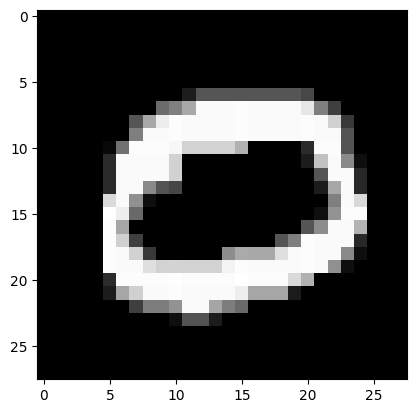

Label: 0.0


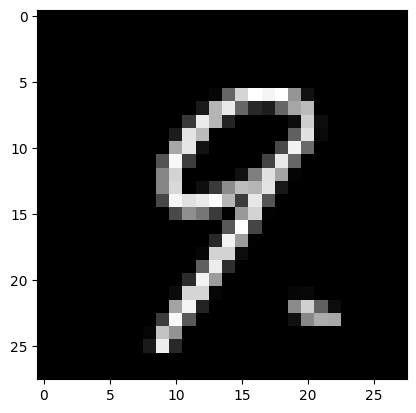

Label: 9.0


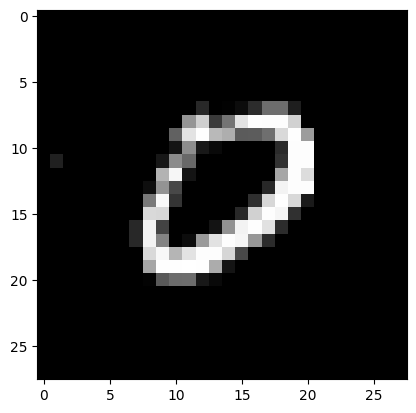

Label: 9.0


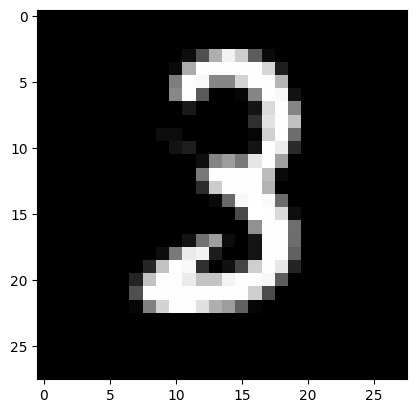

Label: 3.0


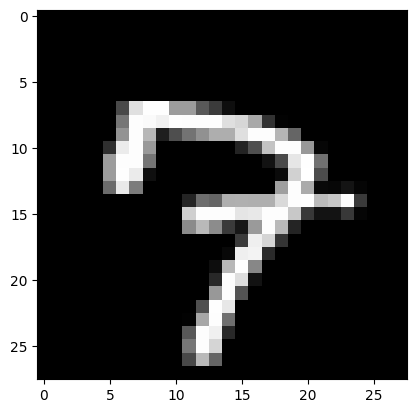

Label: 7.0


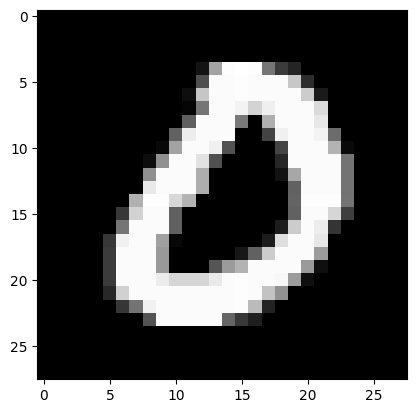

Label: 0.0


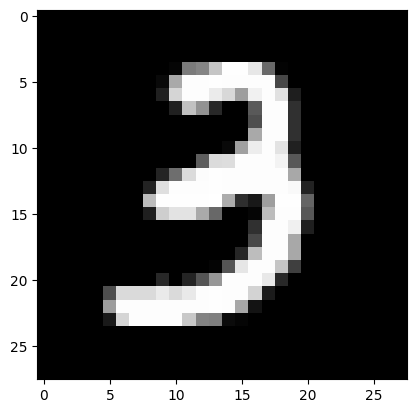

Label: 3.0


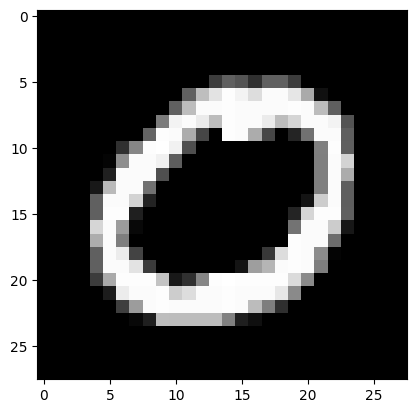

Label: 0.0


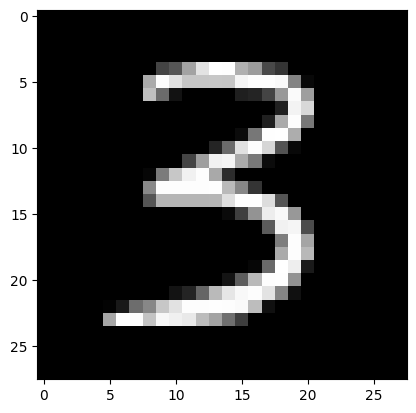

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 90:10 and K=6**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.90)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=6)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

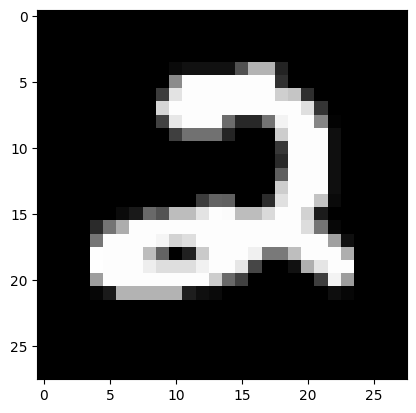

Label: 2.0


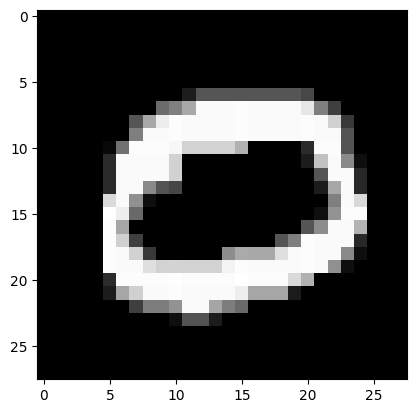

Label: 0.0


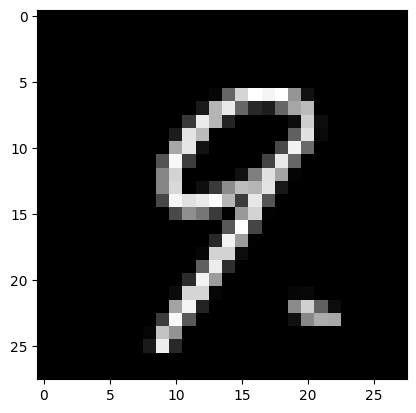

Label: 9.0


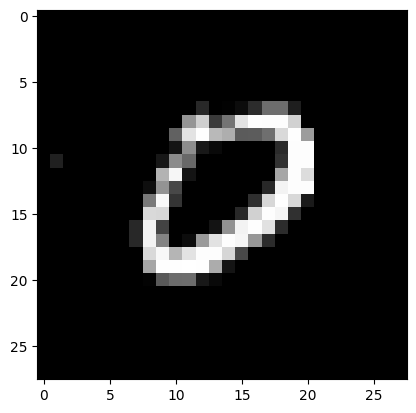

Label: 9.0


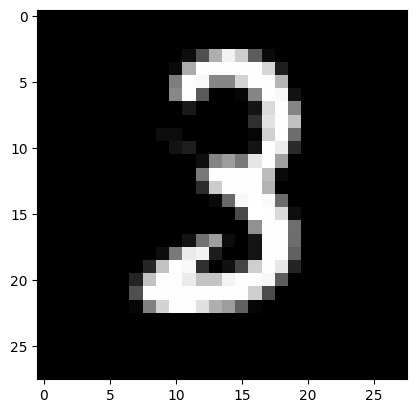

Label: 3.0


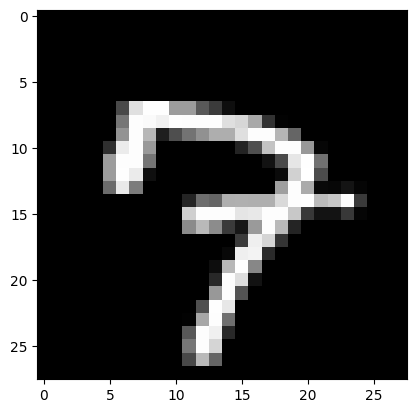

Label: 7.0


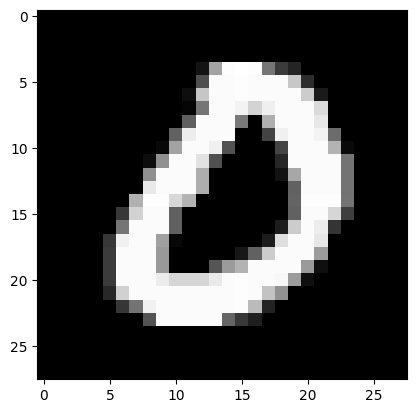

Label: 0.0


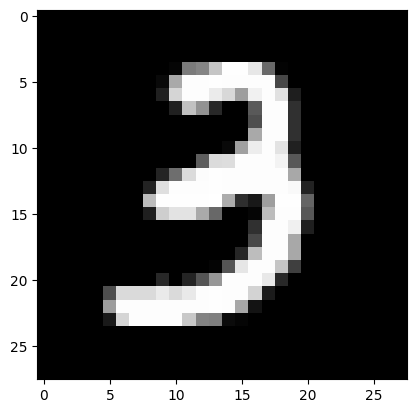

Label: 3.0


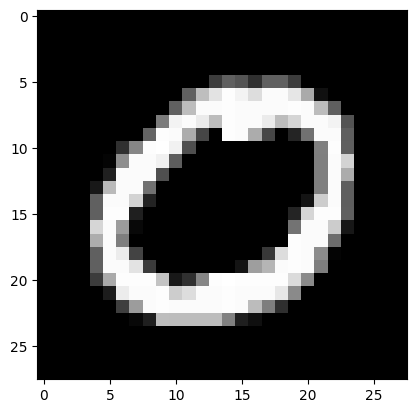

Label: 0.0


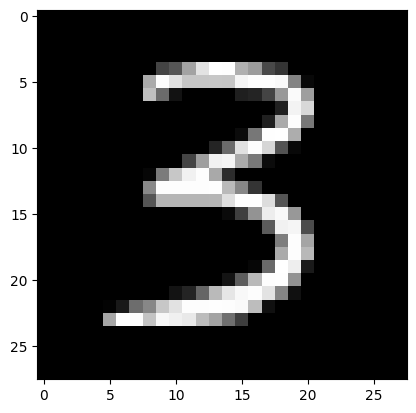

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 90:10 and K=7**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.90)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=7)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

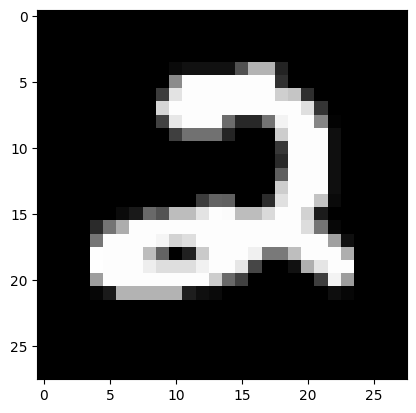

Label: 2.0


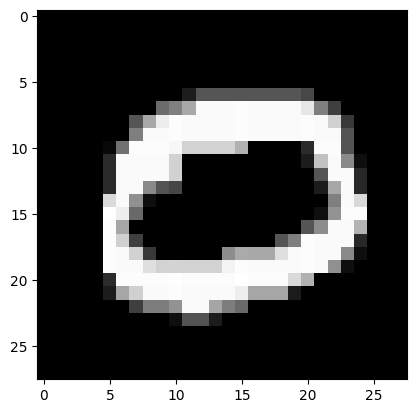

Label: 0.0


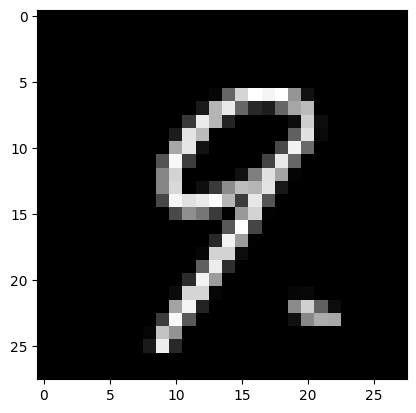

Label: 9.0


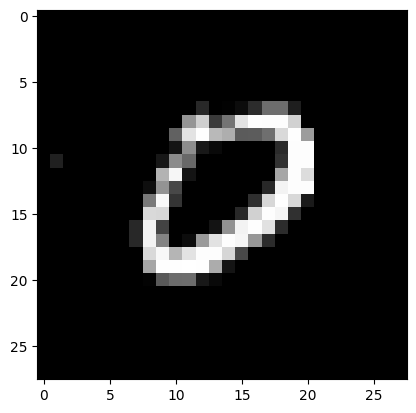

Label: 9.0


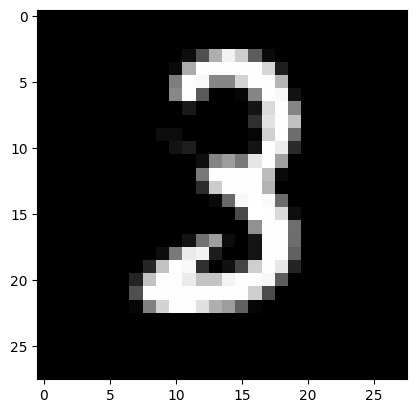

Label: 3.0


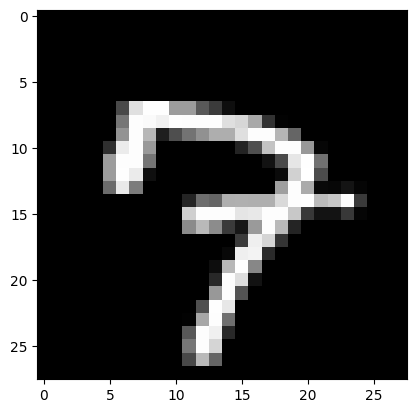

Label: 7.0


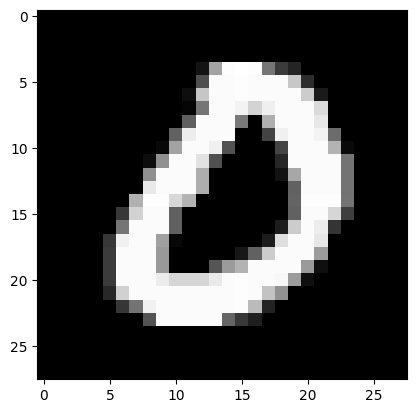

Label: 0.0


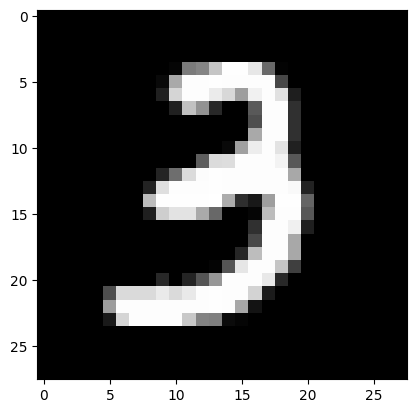

Label: 3.0


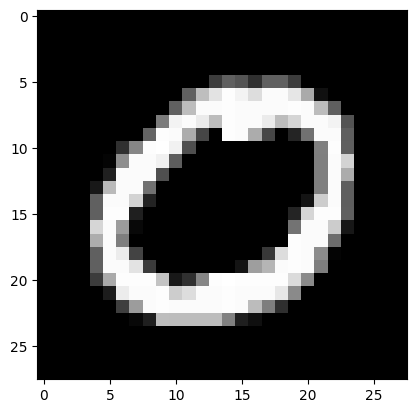

Label: 0.0


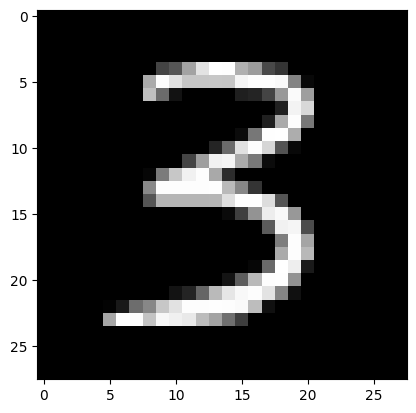

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 90:10 and K=10**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.90)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=10)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

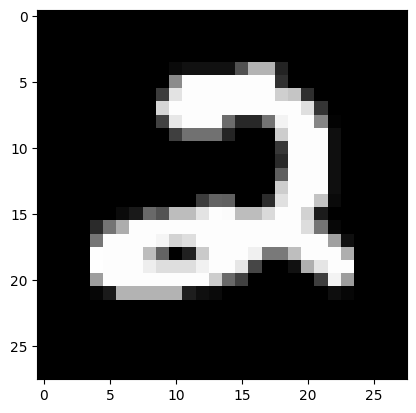

Label: 2.0


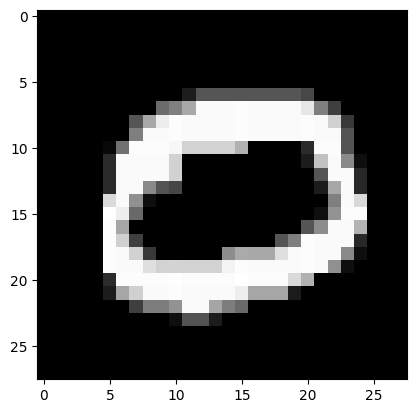

Label: 0.0


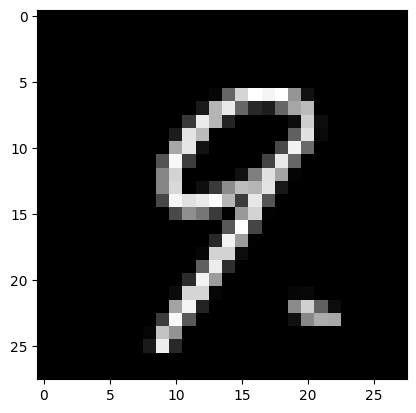

Label: 9.0


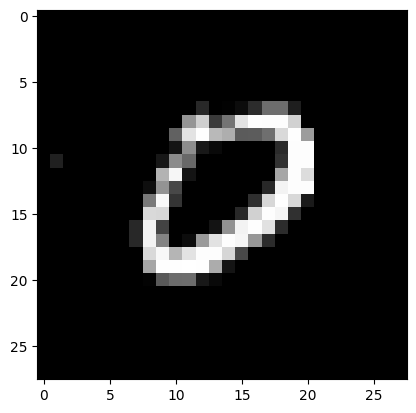

Label: 9.0


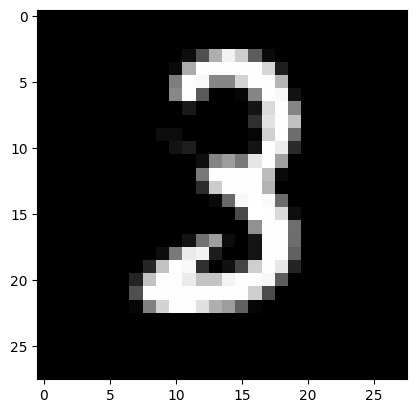

Label: 3.0


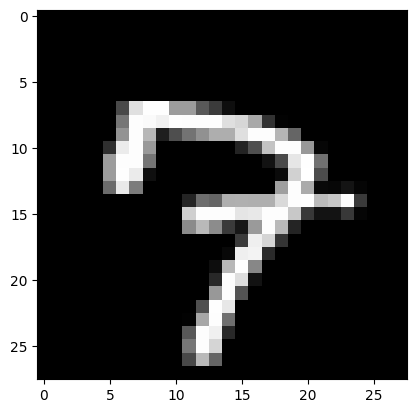

Label: 7.0


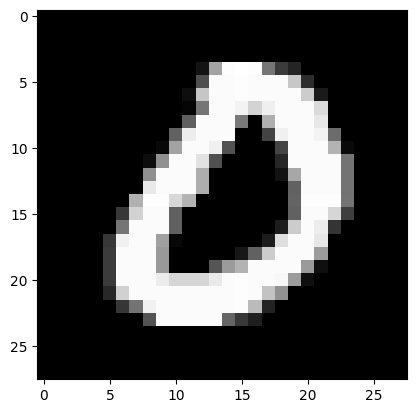

Label: 0.0


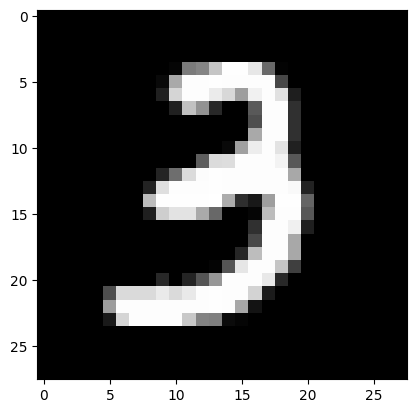

Label: 3.0


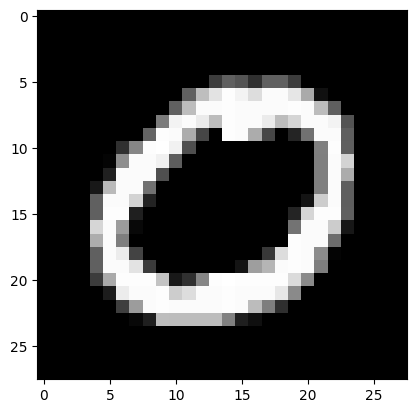

Label: 0.0


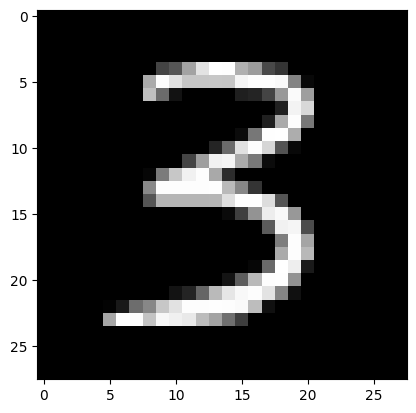

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 95:5 and K=2**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.95)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=2)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

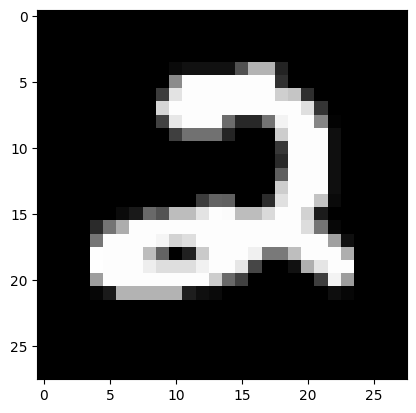

Label: 2.0


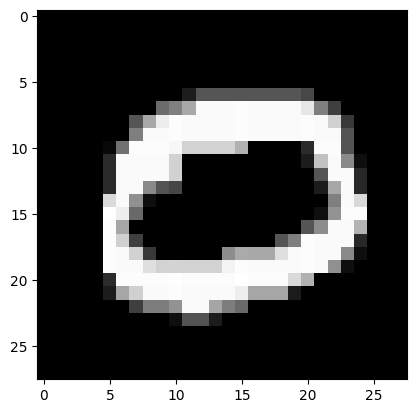

Label: 0.0


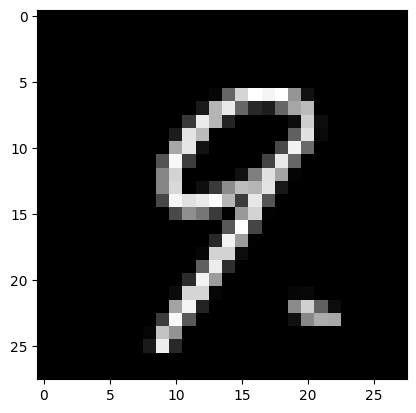

Label: 9.0


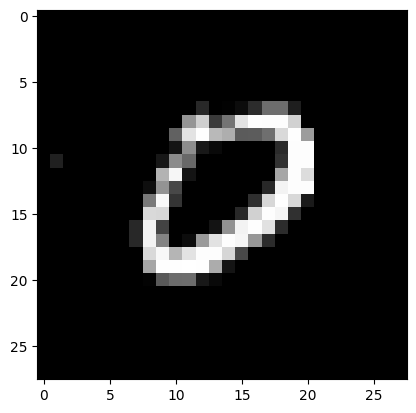

Label: 9.0


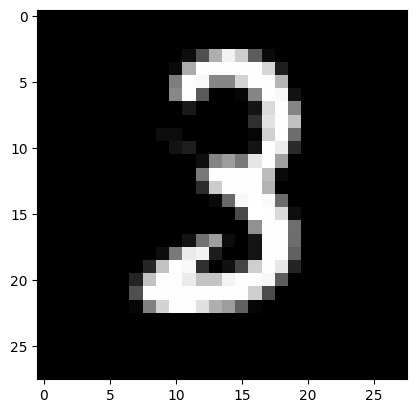

Label: 3.0


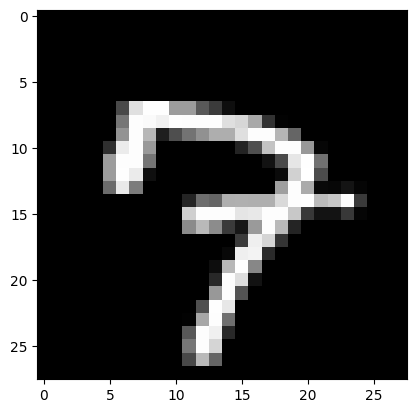

Label: 7.0


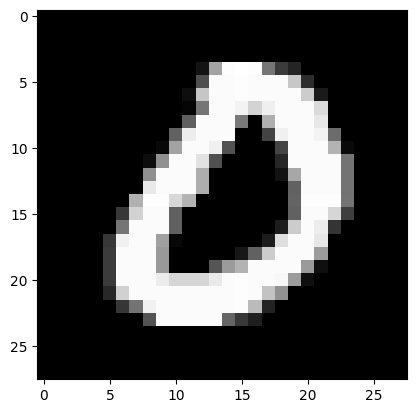

Label: 0.0


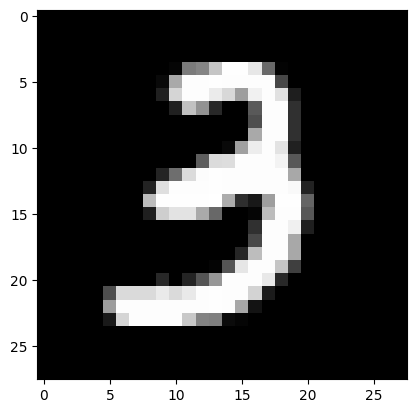

Label: 3.0


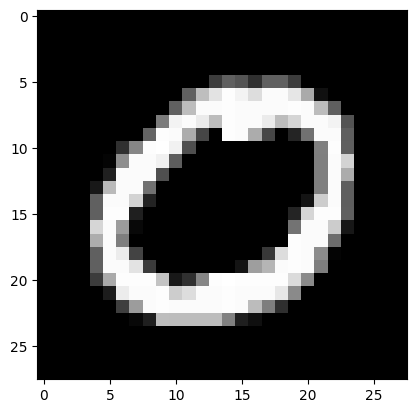

Label: 0.0


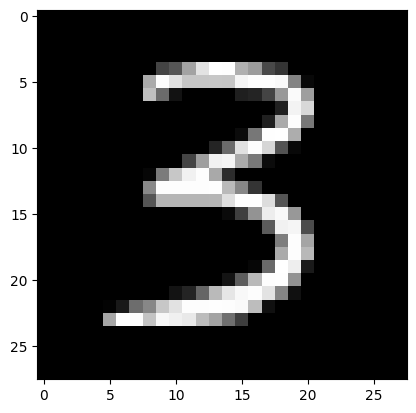

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 95:5 and K=4**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.95)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=4)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

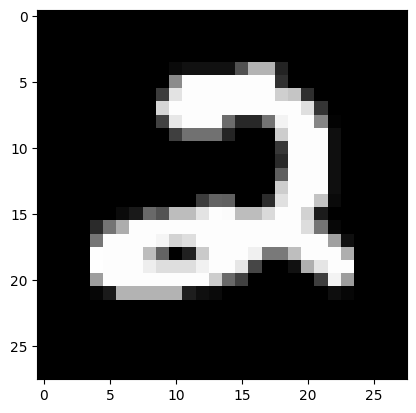

Label: 2.0


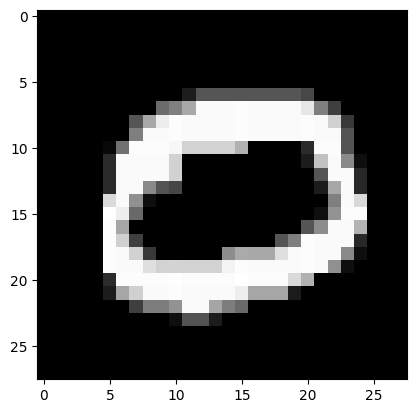

Label: 0.0


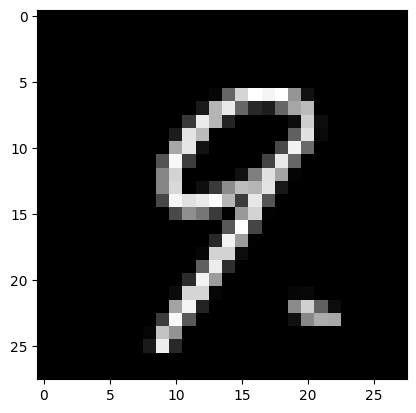

Label: 9.0


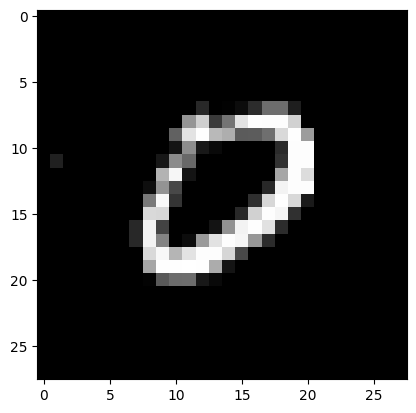

Label: 9.0


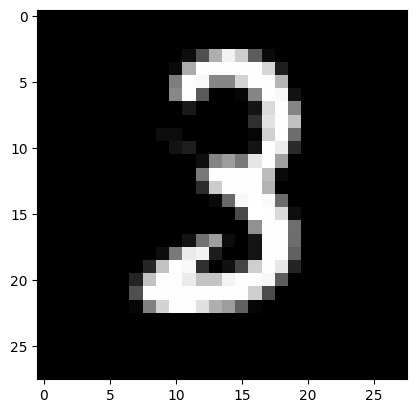

Label: 3.0


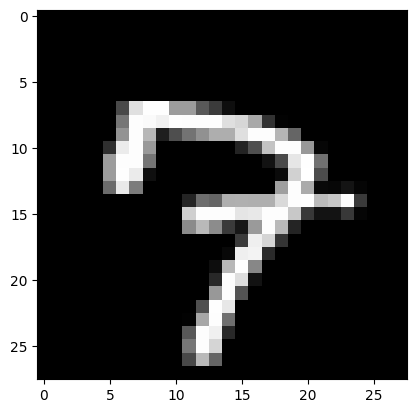

Label: 7.0


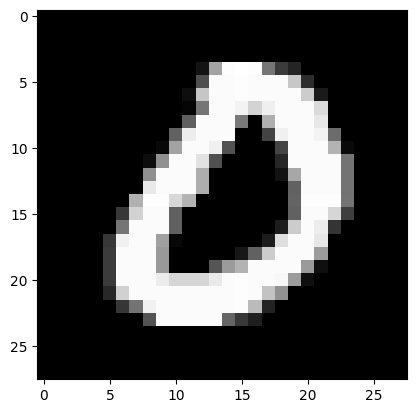

Label: 0.0


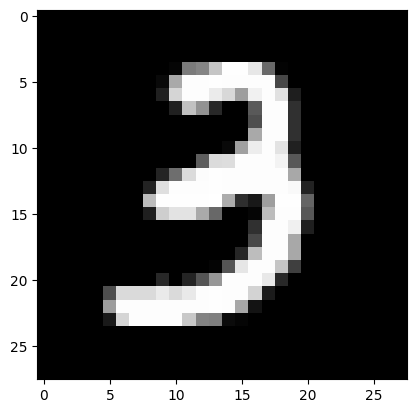

Label: 3.0


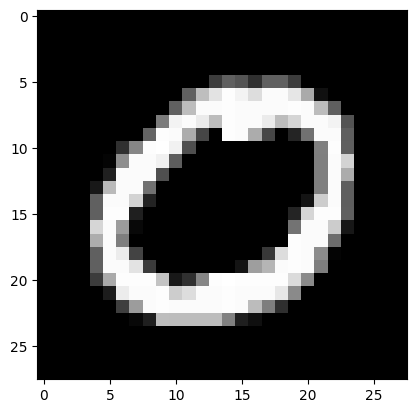

Label: 0.0


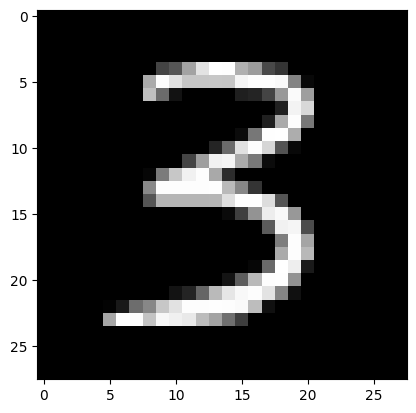

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 95:5 and K=5**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.95)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

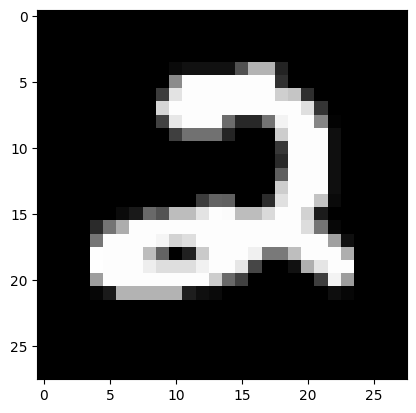

Label: 2.0


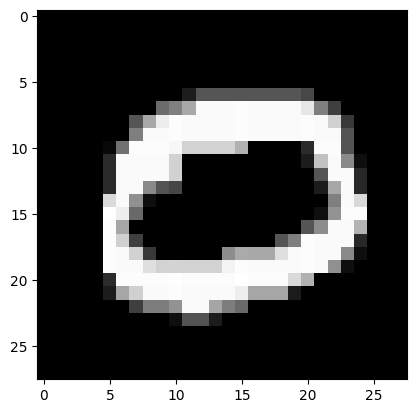

Label: 0.0


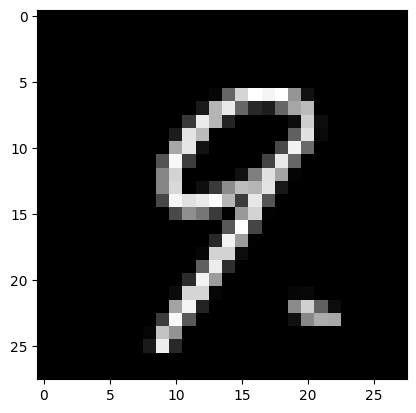

Label: 9.0


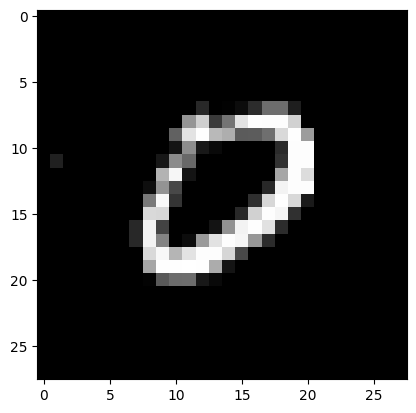

Label: 9.0


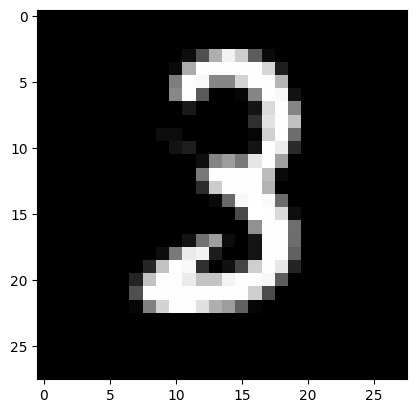

Label: 3.0


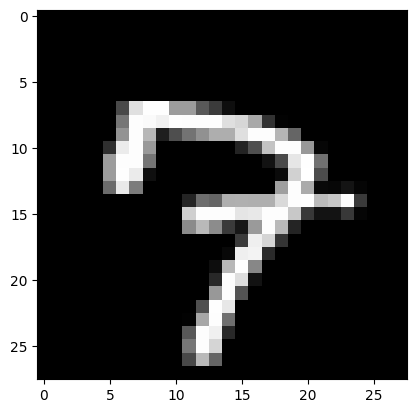

Label: 7.0


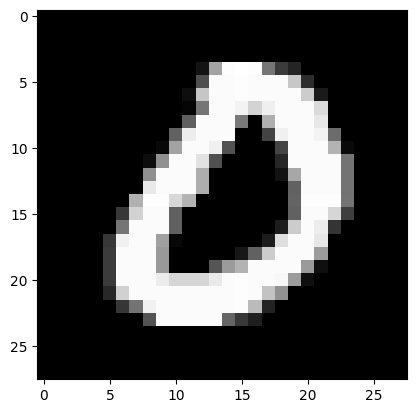

Label: 0.0


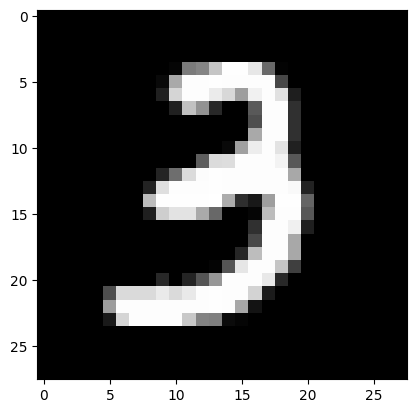

Label: 3.0


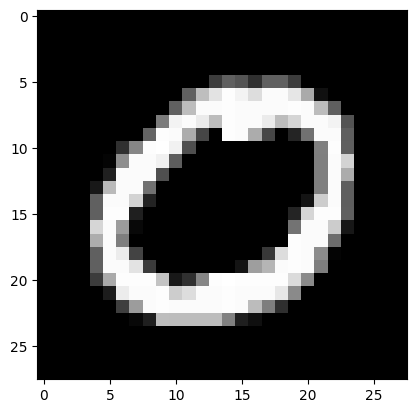

Label: 0.0


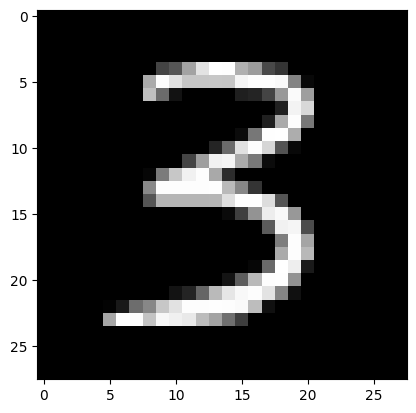

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 95:5 and K=6**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.95)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=6)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

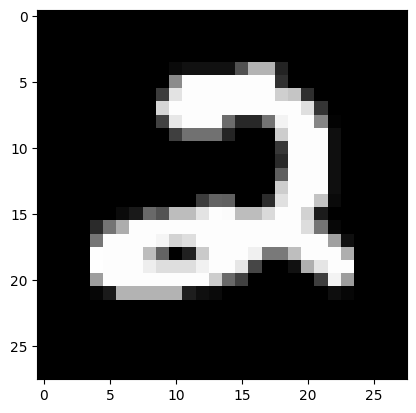

Label: 2.0


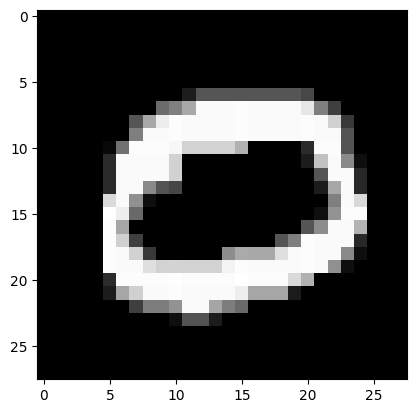

Label: 0.0


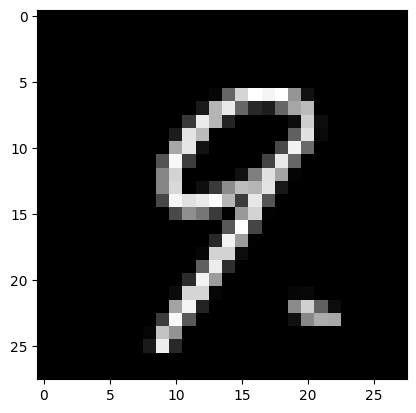

Label: 9.0


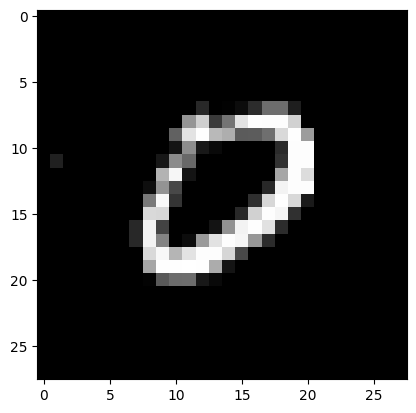

Label: 9.0


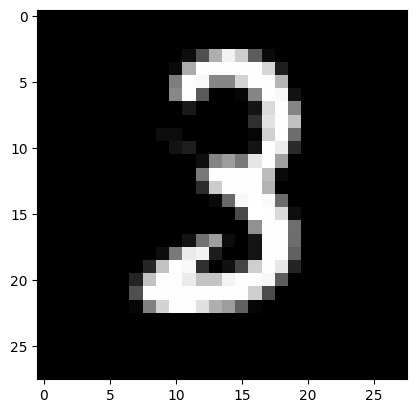

Label: 3.0


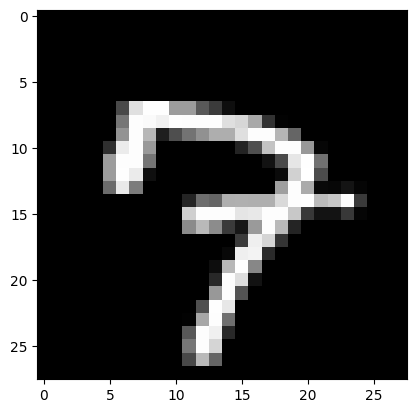

Label: 7.0


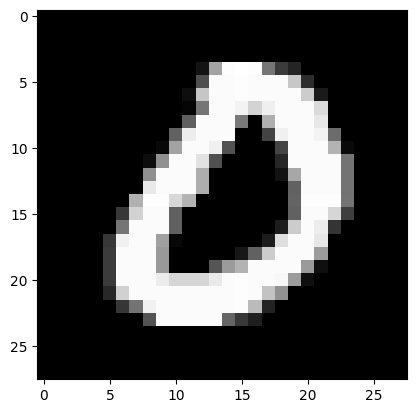

Label: 0.0


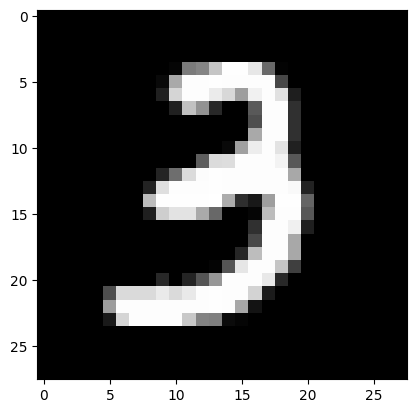

Label: 3.0


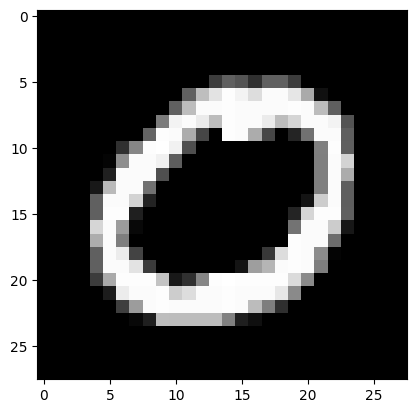

Label: 0.0


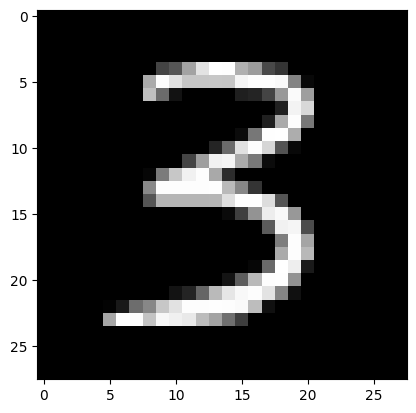

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 95:5 and K=7**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.95)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=7)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

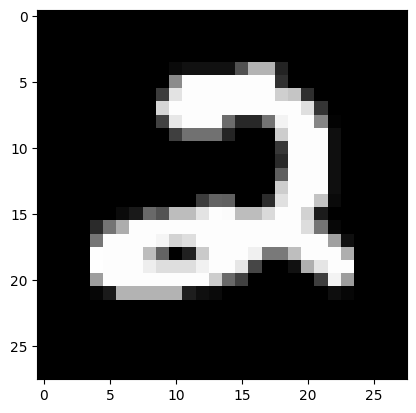

Label: 2.0


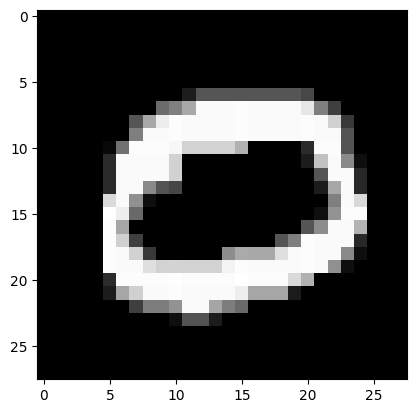

Label: 0.0


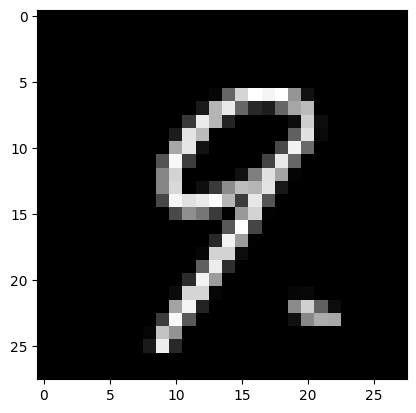

Label: 9.0


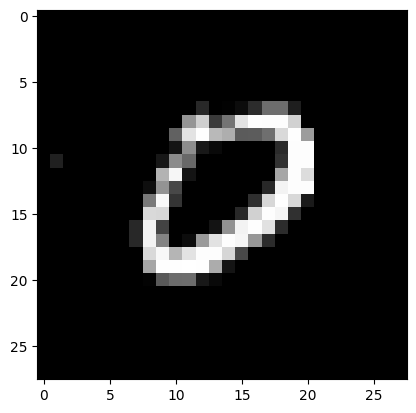

Label: 9.0


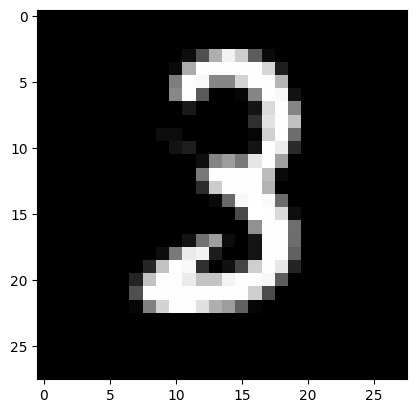

Label: 3.0


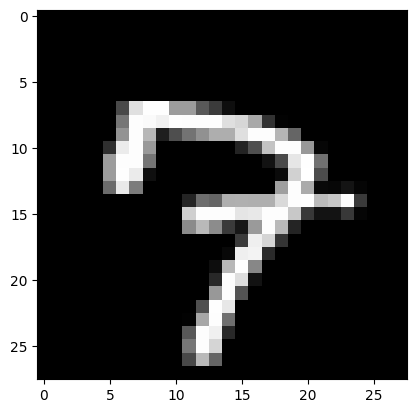

Label: 7.0


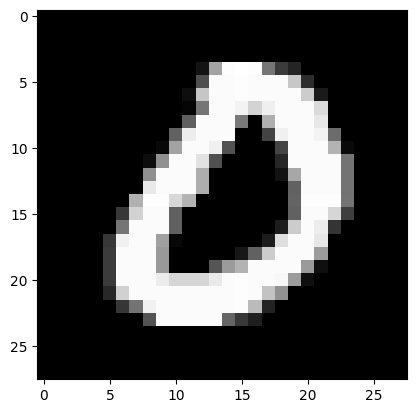

Label: 0.0


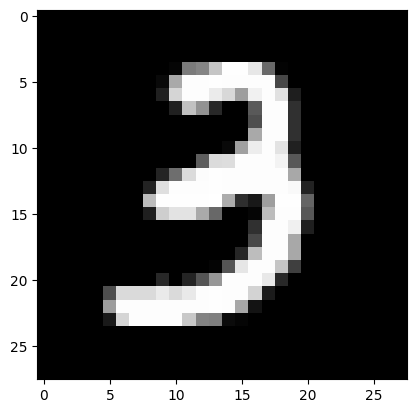

Label: 3.0


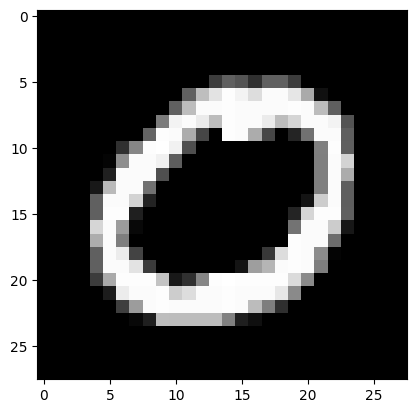

Label: 0.0


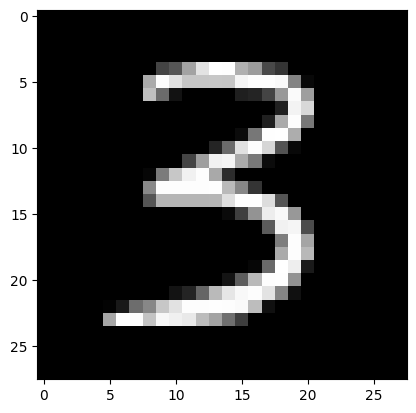

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))


## **Spliting data into 95:5 and K=10**

### **Spliting of data into train and test**

In [ ]:
split = int(X.shape[0] * 0.95)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(3000, 784) (3000,)
(2000, 784) (2000,)
[1 0 1 ... 3 2 3]
[7 4 9 ... 8 7 9]


### **KNN Algorithm**

In [ ]:
def knn(X_train, y_train, test_point, k):

    distances = [] # Contains list of tuples (distance, label

    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    #     for i in range(X_train.shape[0]):
    #         data_point = X_train[i]
    #         label = y_train[i]

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

### **Calculating the Accuracy**

In [ ]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):

    predictions = []

    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)

    predictions = np.array(predictions)

    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [ ]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=10)

0.9155

### **Loading the testing dataset**

In [ ]:

test_df = pd.read_csv("/content/test.csv")


In [ ]:
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [ ]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 784)

### **Detecting the Digits**

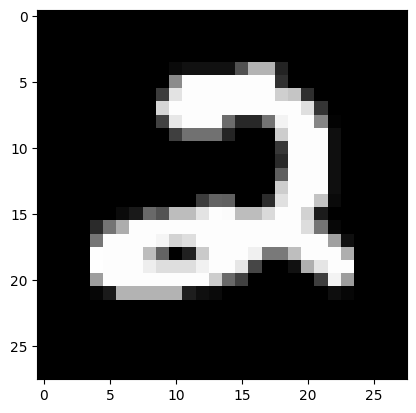

Label: 2.0


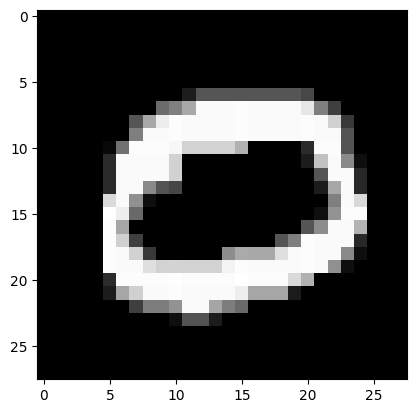

Label: 0.0


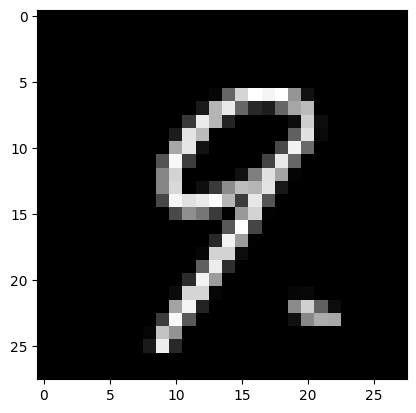

Label: 9.0


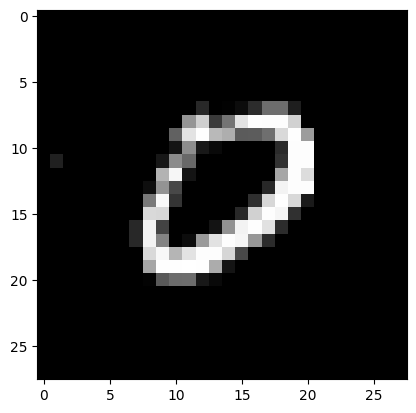

Label: 9.0


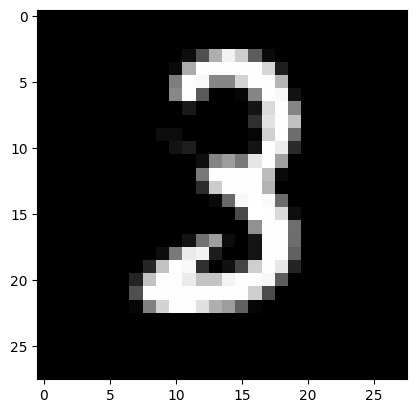

Label: 3.0


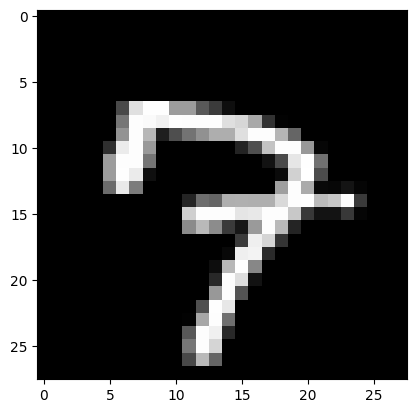

Label: 7.0


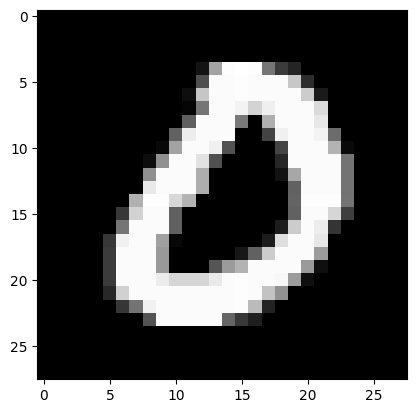

Label: 0.0


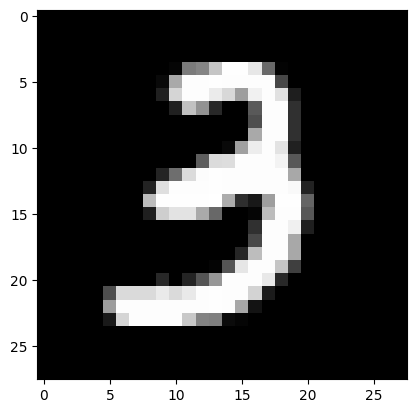

Label: 3.0


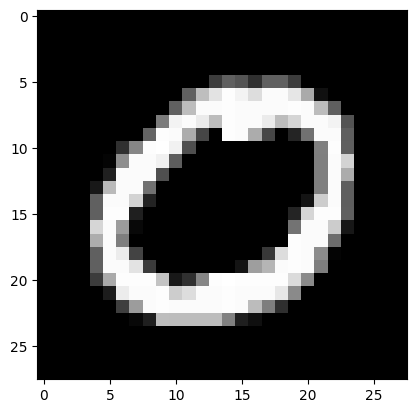

Label: 0.0


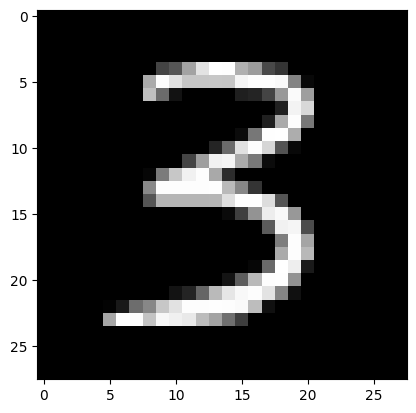

Label: 3.0


In [ ]:
for test in test_images:
    im = test.reshape((28,28))
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, test, k=4))
